<img src="cetelem1b.jpg" />

# Imports

In [2]:
# Math et données
import numpy as np
# import scipy
# from scipy.stats import zscore
import pandas as pd
from datetime import date
import itertools

# Librairies graphiques
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Pre-processing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Feature selection
from sklearn.model_selection import GridSearchCV, KFold

# ML
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [4]:
import joblib

In [5]:
# Modules perso
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2

In [6]:
import DisplotData, PwePwocess, Funktiuns
from DisplotData import bcolors
import MLstuff

In [7]:
pd.set_option("display.max_columns", 150) # None

# Chargement des données

In [8]:
data_dir = "../input/"

In [9]:
df_application_train = pd.read_csv(data_dir+'application_train.csv')
df_application_test = pd.read_csv(data_dir+'application_test.csv')


In [10]:
df_bureau = pd.read_csv(data_dir+'bureau.csv')
df_bureau_balance = pd.read_csv(data_dir+'bureau_balance.csv')
df_credit_card_balance = pd.read_csv(data_dir+'credit_card_balance.csv')
df_installments_payments = pd.read_csv(data_dir+'installments_payments.csv')
df_POS_CASH_balance = pd.read_csv(data_dir+'POS_CASH_balance.csv')
df_previous_application = pd.read_csv(data_dir+'previous_application.csv')

# Exploration des données

## Variables initiales

<img src="home_credit.png" />

### Description des colonnes

```
- **application_{train|test}.csv**

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

 - **bureau.csv**

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

 - **bureau_balance.csv**

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

 - **POS_CASH_balance.csv**

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

 - **credit_card_balance.csv**

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

 - **previous_application.csv**

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

 - **installments_payments.csv**

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

 - **HomeCredit_columns_description.csv**

This file contains descriptions for the columns in the various data files.
```

 - **application_{train|test}.csv**

Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

 - **bureau.csv**

Tous les crédits antérieurs du client fournis par d'autres institutions financières qui ont été signalés au bureau de crédit (pour les clients qui ont un prêt dans notre échantillon).
Pour chaque prêt de notre échantillon, il y a autant de lignes que le nombre de crédits que le client avait dans le Credit Bureau avant la date de la demande.

 - **bureau_balance.csv**

Soldes mensuels des crédits antérieurs au bureau de crédit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent signalé au bureau de crédit - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois où nous avons un historique observable pour les crédits précédents) lignes.

 - **POS_CASH_balance.csv**

Instantanés mensuels du solde des points de vente précédents et des prêts en espèces que le demandeur avait contractés avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de crédits précédents relatifs * # de mois dans lequel nous avons un historique observable pour les lignes des crédits précédents).

 - **credit_card_balance.csv**

Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) lié aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon * # de cartes de crédit précédentes relatives * # de mois où nous avons un historique observable pour la carte de crédit précédente) lignes.

 - **previous_application.csv**

Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

 - **installments_payments.csv**

Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon.
Il y a a) une ligne pour chaque paiement effectué plus b) une ligne pour chaque paiement manqué.
Une ligne équivaut à un versement d'une échéance OU une échéance correspondant à un versement d'un précédent crédit immobilier lié aux prêts de notre échantillon.

 - **HomeCredit_columns_description.csv**

Ce fichier contient les descriptions des colonnes des différents fichiers de données.


In [11]:
df_application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
df_application_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

In [13]:
df_application_train.shape

(307511, 122)

In [14]:
df_application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [15]:
df_application_test.tail()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.002042,-19970,-5169,-9094.0,-3399,NaN,1,1,1,1,1,0,NaN,1.0,3,3,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.648575,0.643026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-684.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.035792,-11186,-1149,-3015.0,-3003,NaN,1,1,0,1,0,0,Sales staff,4.0,2,2,MONDAY,11,0,0,0,0,1,1,Trade: type 7,NaN,0.684596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.026392,-15922,-3037,-2681.0,-1504,4.0,1,1,0,1,1,0,NaN,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.733503,0.632770,0.283712,0.1113,0.1364,0.9955,NaN,NaN,0.16,0.1379,0.3333,NaN,NaN,NaN,0.1383,NaN,0.0542,0.1134,0.1415,0.9955,NaN,NaN,0.1611,0.1379,0.3333,NaN,NaN,NaN,0.1441,NaN,0.0574,0.1124,0.1364,0.9955,NaN,NaN,0.16,0.1379,0.3333,NaN,NaN,NaN,0.1408,NaN,0.0554,NaN,block of flats,0.1663,"Stone, brick",No,0.0,0.0,0.0,0.0,-838.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,2

In [16]:
df_application_test.shape

(48744, 121)

In [17]:
456222 in df_bureau['SK_ID_CURR'].values

False

In [18]:
456253 in df_bureau['SK_ID_CURR'].values

True

In [19]:
for ids in [100005, 456222]:
    print(f"ids: {ids}")
    for df in [df_bureau,
            df_bureau_balance,
            df_credit_card_balance,
            df_installments_payments,
            df_POS_CASH_balance,
            df_previous_application]:
        if 'SK_ID_CURR' in df.columns: 
            print(ids in df['SK_ID_CURR'].values)

ids: 100005
True
False
True
True
True
ids: 456222
False
False
True
True
True


Donc certains ID sur lesquels la compétition demande une prédiction **n'ont pas d'informations complémentaires dans toutes les autres tables que celles données dans `application_test.csv` !**
 - [ ] Confirmer avec Yann que celà implique que l'algorithme choisi doit être robuste aux NaN pour les variables supplémentaires (par rapport à celle dans `application_{train|test}.csv`), ou bien que la démarche de FE les impute

OK donc la target est sur les **difficultés de paiement*(1: oui, 0: non), càd plus de X jours de retard sur les Y premières échéances.
Infos : 
 - client possède une voiture
 - client possède un appartement ou une maison
 - prix des biens pour un prêt à la consommation
 - Qui accompagnait le client lors de sa demande de prêt ?!
 - NAME_HOUSING_TYPE : type de logement actuel du client (locataire, vivant avec les parents...)
 - DAYS_REGISTRATION : Combien de jours avant la demande le client a-t-il modifié son inscription ?!
 - DAYS_ID_PUBLISH : Combien de jours avant la demande le client a-t-il changé la pièce d'identité avec laquelle il a demandé le prêt
 - Age de la voiture du client !!
 - FLAG_CONT_MOBILE : le portable a pû être joint !!
 - Score de région du client (par l'organisme de prêt) !
 - Quel jour de la semaine le client a-t-il demandé le prêt !!
 - A quelle heure dans le jour le client a-t-il demandé le prêt !!
 - Score en provenance d'autres sources (3 possibles), normalisé
 - Lieu de vie du client : taille de l'appartement, aire commune, surface habitable, âge de l'immeuble, nombre d'ascenseurs, nombre d'entrées, état de l'immeuble, nombre d'étages
 - Combien d'observations de l'environnement social du client avec un défaut observable de 30 DPD (jours de retard) ?!
 - Combien d'observations de l'environnement social du client ont manqué 30 DPD (jours de retard) ?
 - Nombre de jours entre le changement de téléphone portable du client et la demande de prêt ?!
 - Nombre de demandes de renseignements au bureau de crédit au sujet du client une heure/mois/trimestre/année avant la demande (moins une période de marge)
 - CC : Montant tiré au cours du mois du crédit précédent
 - CC : Montant des autres tirages au cours du mois du crédit précédent
 - CC : Nombre de tirages au guichet automatique durant ce mois sur le crédit précédent
 - PA : AMT_DOWN_PAYMENT : Acompte sur la demande précédente (Down payment on the previous application)
 - PA : Par rapport à la demande actuelle, quand la décision concernant la demande précédente a-t-elle été prise
 - PA : Le client était-il un ancien ou un nouveau client lors de la demande précédente ?
 - PA : Par rapport à la date d'application de l'application actuelle, à quand remonte le premier décaissement de l'application précédente
 - IP : Version du calendrier des versements (0 pour carte de crédit) du crédit précédent. Le changement de version de versement d'un mois à l'autre signifie que certains paramètres du calendrier de paiement ont changé
 - IP : Sur quel versement nous observons le paiement ?!
 - IP : **DAYS_ENTRY_PAYMENT : Quand les échéances du crédit précédent ont-elles été effectivement payées (par rapport à la date de demande du prêt en cours)**

DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE

In [20]:
df_application_train.shape

(307511, 122)

In [21]:
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [22]:
df_bureau.shape

(1716428, 17)

In [23]:
df_bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [24]:
df_bureau_balance.shape

(27299925, 3)

In [25]:
df_bureau_balance['STATUS'].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [26]:
df_credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [27]:
df_credit_card_balance.shape

(3840312, 23)

In [28]:
df_installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [29]:
df_installments_payments.shape

(13605401, 8)

In [30]:
df_POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [31]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_previous_application.shape

(1670214, 37)

In [33]:
df_application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [34]:
for df, df_name in [
           [df_application_train, 'df_application_train'],
           [df_application_test, 'df_application_test'],
           [df_bureau, 'df_bureau'],
           [df_bureau_balance, 'df_bureau_balance'],
           [df_credit_card_balance, 'df_credit_card_balance'],
           [df_installments_payments, 'df_installments_payments'],
           [df_POS_CASH_balance, 'df_POS_CASH_balance'],
           [df_previous_application, 'df_previous_application'],
           ]:
#     print(f"\ndf_name:\n{df.columns}")
       print('STATUS' in df.columns)

False
False
False
True
False
False
False
False


### Taux de valeurs manquantes

### Value counts

In [35]:
for df in [df_bureau,
           df_bureau_balance,
           df_credit_card_balance,
           df_installments_payments,
           df_POS_CASH_balance,
           df_previous_application]:
    DisplotData.print_value_counts(df, exclude=['OSEBuildingID'])

Légende :


Colonne numérique
-----------------


Colonne catégorielle
--------------------


----------------------------------------------------------------------------------------------------


CREDIT_ACTIVE
-------------
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64


DAYS_ENDDATE_FACT
-----------------



CNT_CREDIT_PROLONG
------------------
0    1707314
1       7620
2       1222
3        191
4         54
5         21
9          2
6          2
8          1
7          1
Name: CNT_CREDIT_PROLONG, dtype: int64


DAYS_CREDIT_UPDATE
------------------
-7        18503
-8        18462
-11       16975
-15       16870
-12       16827
          ...  
-41856        1
-41940        1
-2894         1
-2913         1
-2844         1
Name: DAYS_CREDIT_UPDATE, Length: 2982, dtype: int64


SK_ID_CURR
----------
120860    116
169704     94
318065     78
251643     61
425396     60
         ... 
405288      1
413028      1
288569  

### Sélection des premières variables de travail

### Fusion des doublons

### Suppression des lignes contenant des valeurs manquantes

### Nettoyage

In [105]:
def transform_operations(row):
    if Funktiuns.isNaN(row):
        return row
    row = row.split(',')
    return row

### Imputations

# Noyau Kaggle 1 

In [36]:
import re

In [51]:
submission_file_name = "submission_kernel02.csv"

In [109]:
# Display/plot feature importance
def display_importances(feature_importance_df_, n_feat=40, algo_name=''):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:n_feat].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    result = best_features[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False).index
    plt.figure()
    # sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    sns.barplot(x="importance", y="feature", data=best_features, order=result)

    plt.title(f'{algo_name} features')
    plt.tight_layout()
    plt.savefig(f'{algo_name}_importances.png')

In [247]:
# HOME CREDIT DEFAULT RISK COMPETITION
# Most features are created by applying min, max, mean, sum and var functions to grouped tables. 
# Little feature selection is done and overfitting might be a problem since many features are related.
# The following key ideas were used:
# - Divide or subtract important features to get rates (like annuity and income)
# - In Bureau Data: create specific features for Active credits and Closed credits
# - In Previous Applications: create specific features for Approved and Refused applications
# - Modularity: one function for each table (except bureau_balance and application_test)
# - One-hot encoding for categorical features
# All tables are joined with the application DF using the SK_ID_CURR key (except bureau_balance).
# You can use LightGBM with KFold or Stratified KFold.

# Update 16/06/2018:
# - Added Payment Rate feature
# - Removed index from features
# - Use standard KFold CV (not stratified)

import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from lightgbm import early_stopping
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv and application_test.csv
def application_train_test(selected_features=None, num_rows=None, nan_as_category=False):
    # Read data and merge
    df = pd.read_csv('../input/application_train.csv', nrows= num_rows)
    # df = df_application_train
    test_df = pd.read_csv('../input/application_test.csv', nrows= num_rows)
    # test_df = df_application_train
    print("Train samples: {}, test samples: {}".format(len(df), len(test_df)))
    df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    df = df[df['CODE_GENDER'] != 'XNA']
    
    # Keep only wished cols, if they are specified
    if not selected_features is None:
        kept_cols = selected_features['Row'].values
        efc_kept_cols = [c for c in df.columns if c in kept_cols]
        df = df[efc_kept_cols]

    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    del test_df
    gc.collect()
    return df, cat_cols

# Preprocess bureau.csv and bureau_balance.csv
def bureau_and_balance(selected_features=None, num_rows=None, nan_as_category=True):
    # bureau = pd.read_csv('../input/bureau.csv', nrows = num_rows)
    bureau = df_bureau # global
    # bb = pd.read_csv('../input/bureau_balance.csv', nrows = num_rows)
    bb = df_bureau_balance # global
    # Keep only wished cols, if they are specified
    if not selected_features is None:
        kept_cols = selected_features['Row'].values
        efc_kept_cols = [c for c in bureau.columns if c in kept_cols]
        bureau = bureau[efc_kept_cols]
        efc_kept_cols = [c for c in bb.columns if c in kept_cols]
        bb =  bb[efc_kept_cols]

    bb, bb_cat = one_hot_encoder(bb, nan_as_category)
    bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category)
    
    # Bureau balance: Perform aggregations and merge with bureau.csv
    bb_aggregations = {}
    # Numerical
    if not selected_features is None:
        bb_num = list(set(bb.columns)-set(bb_cat)-set(['SK_ID_CURR', 'SK_ID_BUREAU']))
        # ops = selected_features.loc[selected_features['Row']=='MONTHS_BALANCE', 'Operations'].values[0] # TODO : fonction
        # bb_aggregations = {'MONTHS_BALANCE': ops} y sera !
        for col in bb_num:
            ops = selected_features.loc[(selected_features['Table'].str.startswith('bureau')) & (selected_features['Row']==col), 'Operations'].values
            # print(col, ops) # DEBUG
            if len(ops): 
                bb_aggregations[col] = ops[0] # TODO : attention plusieurs features ont le même nom
    else:
        bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
    # Categorical
    for col in bb_cat:
        bb_aggregations[col] = ['mean'] # TODO : récupérer les opérations souhaitées pour la feature racine

    # print(bb_aggregations)
    # print(f"bb = {bb}") # DEBUG

    bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
    # print(bb_aggregations) # DEBUG
    bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
    # *** ICI on a modifié le nom des colonnes, donc cat_cols doit devenir cette nouvelle liste
    bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
    bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
    del bb, bb_agg
    gc.collect()
    # print(f"bureau.columns 1 = {bureau.columns}") # DEBUG
    
    # Bureau and bureau_balance numeric features
    if not selected_features is None:
        bb_num = list(set(bureau.columns)-set(bureau_cat)-set(bb_cat)-set(['SK_ID_CURR', 'SK_ID_BUREAU']))
        num_aggregations = {}
        for col in bb_num:
            ops = selected_features.loc[(selected_features['Table'].str.startswith('bureau')) & (selected_features['Row']==col), 'Operations'].values
            # print(col, ops) # DEBUG
            if len(ops): 
                num_aggregations[col] = ops[0] # TODO : attention plusieurs features ont le même nom
    
    else:
        num_aggregations = {
            'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
            'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
            'DAYS_CREDIT_UPDATE': ['mean'],
            'CREDIT_DAY_OVERDUE': ['max', 'mean'],
            'AMT_CREDIT_MAX_OVERDUE': ['mean'],
            'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
            'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
            'AMT_CREDIT_SUM_OVERDUE': ['mean'],
            'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
            'AMT_ANNUITY': ['max', 'mean'],
            'CNT_CREDIT_PROLONG': ['sum'],
            'MONTHS_BALANCE_MIN': ['min'],
            'MONTHS_BALANCE_MAX': ['max'],
            'MONTHS_BALANCE_SIZE': ['mean', 'sum']
        }
    # Bureau and bureau_balance categorical features
    cat_aggregations = {}
    for cat in bureau_cat: cat_aggregations[cat] = ['mean']
    for cat in bb_cat: cat_aggregations[cat + "_MEAN"] = ['mean']
    
    bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    bureau_agg.columns = pd.Index(['BURO_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
    # Bureau: Active credits - using only numerical aggregations
    active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
    active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
    active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
    del active, active_agg
    gc.collect()
    # Bureau: Closed credits - using only numerical aggregations
    closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
    closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
    closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
    bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
    del closed, closed_agg, bureau
    gc.collect()
    return bureau_agg, bb_cat, bureau_cat

# Preprocess previous_applications.csv
def previous_applications(selected_features=None, num_rows=None, nan_as_category=True):
    # prev = pd.read_csv('../input/previous_application.csv', nrows = num_rows)
    prev = df_previous_application # global
    if not selected_features is None:
        kept_cols = selected_features['Row'].values
        efc_kept_cols = [c for c in prev.columns if c in kept_cols]
        prev = prev[efc_kept_cols]
    prev, prev_cat_cols = one_hot_encoder(prev, nan_as_category= True)
    # Days 365.243 values -> nan
    if 'DAYS_FIRST_DRAWING' in prev.columns: prev['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
    if 'DAYS_FIRST_DUE' in prev.columns: prev['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
    if 'DAYS_LAST_DUE_1ST_VERSION' in prev.columns: prev['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
    if 'DAYS_LAST_DUE' in prev.columns: prev['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
    if 'DAYS_TERMINATION' in prev.columns: prev['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)
    # Add feature: value ask / value received percentage
    if 'AMT_APPLICATION' in prev.columns and 'AMT_CREDIT' in prev.columns: 
        prev['APP_CREDIT_PERC'] = prev['AMT_APPLICATION'] / prev['AMT_CREDIT']
        prev.loc[prev['APP_CREDIT_PERC']>1.e300] = 1. # CG
    # Previous applications numeric features
    # num_aggregations = {
    #     'AMT_ANNUITY': ['min', 'max', 'mean'],
    #     'AMT_APPLICATION': ['min', 'max', 'mean'],
    #     'AMT_CREDIT': ['min', 'max', 'mean'],
    #     'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
    #     'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
    #     'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
    #     'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
    #     'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    #     'DAYS_DECISION': ['min', 'max', 'mean'],
    #     'CNT_PAYMENT': ['mean', 'sum'],
    # }
    num_aggregations = {}
    if 'AMT_ANNUITY' in prev.columns: num_aggregations['AMT_ANNUITY'] = ['min', 'max', 'mean'] # TODO : fonction à partir du dico ci-dessus
    if 'AMT_APPLICATION' in prev.columns: num_aggregations['AMT_APPLICATION'] = ['min', 'max', 'mean']
    if 'AMT_CREDIT' in prev.columns: num_aggregations['AMT_CREDIT'] = ['min', 'max', 'mean']
    if 'APP_CREDIT_PERC' in prev.columns: num_aggregations['APP_CREDIT_PERC'] = ['min', 'max', 'mean', 'var']
    if 'AMT_DOWN_PAYMENT' in prev.columns: num_aggregations['AMT_DOWN_PAYMENT'] = ['min', 'max', 'mean']
    if 'AMT_GOODS_PRICE' in prev.columns: num_aggregations['AMT_GOODS_PRICE'] = ['min', 'max', 'mean']
    if 'HOUR_APPR_PROCESS_START' in prev.columns: num_aggregations['HOUR_APPR_PROCESS_START'] = ['min', 'max', 'mean']
    if 'RATE_DOWN_PAYMENT' in prev.columns: num_aggregations['RATE_DOWN_PAYMENT'] = ['min', 'max', 'mean']
    if 'DAYS_DECISION' in prev.columns: num_aggregations['DAYS_DECISION'] = ['min', 'max', 'mean']
    if 'CNT_PAYMENT' in prev.columns: num_aggregations['CNT_PAYMENT'] = ['mean', 'sum']
    
    # Previous applications categorical features
    cat_aggregations = {}
    for cat in prev_cat_cols:
        cat_aggregations[cat] = ['mean'] # Donc le OneHot devient non-entier
    
    prev_agg = prev.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
    prev_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])
    # Previous Applications: Approved Applications - only numerical features
    approved = prev[prev['NAME_CONTRACT_STATUS_Approved'] == 1]
    approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
    approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
    prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
    # Previous Applications: Refused Applications - only numerical features
    refused = prev[prev['NAME_CONTRACT_STATUS_Refused'] == 1]
    refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
    refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
    prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
    del refused, refused_agg, approved, approved_agg, prev
    gc.collect()
    return prev_agg, prev_cat_cols

# Preprocess POS_CASH_balance.csv
def pos_cash(selected_features=None, num_rows=None, nan_as_category=True):
    # pos = pd.read_csv('../input/POS_CASH_balance.csv', nrows = num_rows)
    pos = df_POS_CASH_balance # global
    if not selected_features is None:
        kept_cols = selected_features['Row'].values
        efc_kept_cols = [c for c in pos.columns if c in kept_cols]
        pos = pos[efc_kept_cols]
    pos, pos_cat_cols = one_hot_encoder(pos, nan_as_category= True)
    # Features
    # aggregations = {
    #     'MONTHS_BALANCE': ['max', 'mean', 'size'],
    #     'SK_DPD': ['max', 'mean'],
    #     'SK_DPD_DEF': ['max', 'mean']
    # }
    aggregations = {}
    if 'MONTHS_BALANCE' in pos.columns: aggregations['MONTHS_BALANCE'] = ['max', 'mean', 'size']
    if 'SK_DPD' in pos.columns: aggregations['SK_DPD'] = ['max', 'mean']
    if 'SK_DPD_DEF' in pos.columns: aggregations['SK_DPD_DEF'] = ['max', 'mean']
    
    for cat in pos_cat_cols:
        aggregations[cat] = ['mean']
    
    pos_agg = pos.groupby('SK_ID_CURR').agg(aggregations)
    pos_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])
    # Count pos cash accounts
    pos_agg['POS_COUNT'] = pos.groupby('SK_ID_CURR').size()
    del pos
    gc.collect()
    return pos_agg, pos_cat_cols
    
# Preprocess installments_payments.csv
def installments_payments(selected_features=None, num_rows=None, nan_as_category=True):
    # ins = pd.read_csv('../input/installments_payments.csv', nrows = num_rows)
    ins = df_installments_payments # global
    if not selected_features is None:
        kept_cols = selected_features['Row'].values
        efc_kept_cols = [c for c in ins.columns if c in kept_cols]
        ins = ins[efc_kept_cols]
    ins, ins_cat_cols = one_hot_encoder(ins, nan_as_category= True)
    # Percentage and difference paid in each installment (amount paid and installment value)
    if 'AMT_PAYMENT' in ins.columns and 'AMT_INSTALMENT' in ins.columns: 
        ins['PAYMENT_PERC'] = ins['AMT_PAYMENT'] / ins['AMT_INSTALMENT']
        ins.loc[ins['PAYMENT_PERC']>1.e300] = 1. # CG
        ins['PAYMENT_DIFF'] = ins['AMT_INSTALMENT'] - ins['AMT_PAYMENT']
    # Days past due and days before due (no negative values)
    if 'DAYS_ENTRY_PAYMENT' in ins.columns and 'DAYS_INSTALMENT' in ins.columns:
        ins['DPD'] = ins['DAYS_ENTRY_PAYMENT'] - ins['DAYS_INSTALMENT']
        ins['DPD'] = ins['DPD'].apply(lambda x: x if x > 0 else 0)
    if 'DAYS_INSTALMENT' in ins.columns and 'DAYS_ENTRY_PAYMENT' in ins.columns: 
        ins['DBD'] = ins['DAYS_INSTALMENT'] - ins['DAYS_ENTRY_PAYMENT']
        ins['DBD'] = ins['DBD'].apply(lambda x: x if x > 0 else 0)
    # Features: Perform aggregations
    # aggregations = {
    #     'NUM_INSTALMENT_VERSION': ['nunique'],
    #     'DPD': ['max', 'mean', 'sum'],
    #     'DBD': ['max', 'mean', 'sum'],
    #     'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
    #     'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
    #     'AMT_INSTALMENT': ['max', 'mean', 'sum'],
    #     'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
    #     'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
    # }
    aggregations = {}
    if 'NUM_INSTALMENT_VERSION' in ins.columns: aggregations['NUM_INSTALMENT_VERSION'] = ['nunique']
    if 'DPD' in ins.columns: aggregations['DPD'] = ['max', 'mean', 'sum']
    if 'DBD' in ins.columns: aggregations['DBD'] = ['max', 'mean', 'sum']
    if 'PAYMENT_PERC' in ins.columns: aggregations['PAYMENT_PERC'] = ['max', 'mean', 'sum', 'var']
    if 'PAYMENT_DIFF' in ins.columns: aggregations['PAYMENT_DIFF'] = ['max', 'mean', 'sum', 'var']
    if 'AMT_INSTALMENT' in ins.columns: aggregations['AMT_INSTALMENT'] = ['max', 'mean', 'sum']
    if 'AMT_PAYMENT' in ins.columns: aggregations['AMT_PAYMENT'] = ['min', 'max', 'mean', 'sum']
    if 'DAYS_ENTRY_PAYMENT' in ins.columns: aggregations['DAYS_ENTRY_PAYMENT'] = ['max', 'mean', 'sum']
    
    for cat in ins_cat_cols:
        aggregations[cat] = ['mean']
    ins_agg = ins.groupby('SK_ID_CURR').agg(aggregations)
    ins_agg.columns = pd.Index(['INSTAL_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])
    # Count installments accounts
    ins_agg['INSTAL_COUNT'] = ins.groupby('SK_ID_CURR').size()
    del ins
    gc.collect()
    return ins_agg, ins_cat_cols

# Preprocess credit_card_balance.csv
def credit_card_balance(selected_features=None, num_rows=None, nan_as_category=True):
    # cc = pd.read_csv('../input/credit_card_balance.csv', nrows = num_rows)
    cc = df_credit_card_balance # global
    if not selected_features is None:
        kept_cols = selected_features['Row'].values
        efc_kept_cols = [c for c in cc.columns if c in kept_cols]
        cc = cc[efc_kept_cols]
    cc, cc_cat_cols = one_hot_encoder(cc, nan_as_category=True)
    # General aggregations
    cc.drop(['SK_ID_PREV'], axis= 1, inplace = True)
    cc_agg = cc.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
    cc_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
    # Count credit card lines
    cc_agg['CC_COUNT'] = cc.groupby('SK_ID_CURR').size()
    del cc
    gc.collect()
    return cc_agg, cc_cat_cols

# LightGBM GBDT with KFold or Stratified KFold
# Parameters from Tilii kernel: https://www.kaggle.com/tilii7/olivier-lightgbm-parameters-by-bayesian-opt/code
def kfold_lightgbm(df, n_folds, stratified = False, debug= False):
    # CG : correction nom de features qui crashe LGBM
    df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

    # Divide in training/validation and test data
    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))
    del df
    gc.collect()
    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= n_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits= n_folds, shuffle=True, random_state=1001)
    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    
    s_moy = []
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        # LightGBM parameters found by Bayesian optimization
        clf = LGBMClassifier(
            nthread=4,
            n_estimators=10000,
            learning_rate=0.02,
            num_leaves=34,
            colsample_bytree=0.9497036,
            subsample=0.8715623,
            max_depth=8,
            reg_alpha=0.041545473,
            reg_lambda=0.0735294,
            min_split_gain=0.0222415,
            min_child_weight=39.3259775,
            silent=-1,
            verbose=-1, )
        params = {
            'nthread': 4,
            'n_estimators': 10000,
            'learning_rate': 0.02,
            'num_leaves': 34,
            'colsample_bytree': 0.9497036,
            'subsample': 0.8715623,
            'max_depth': 8,
            'reg_alpha': 0.041545473,
            'reg_lambda': 0.0735294,
            'min_split_gain': 0.0222415,
            'min_child_weight': 39.3259775,
            'verbose': -1,
            'silent': -1,
        }
        callbacks = [early_stopping(stopping_rounds=200, verbose=0)] #, lgb.log_evaluation(period=0)
        # clf = LGBMClassifier(params)

        clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
            eval_metric= 'auc', verbose= 200, early_stopping_rounds= 200)
            # eval_metric= 'auc', verbose= 200, callbacks=callbacks)

        oof_preds[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = clf.feature_importances_
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        s = roc_auc_score(valid_y, oof_preds[valid_idx])
        s_moy.append(s)
        print('Fold %2d AUC : %.6f' % (n_fold + 1, s))
        del clf, train_x, train_y, valid_x, valid_y
        gc.collect()

    print('Full train AUC score %.6f' % roc_auc_score(train_df['TARGET'], oof_preds))
    print('Full test  AUC score %.6f' % np.array(s_moy).mean())
    print("Alors, c'est pareil, hein ?")
    # Write submission file and plot feature importance
    if not debug:
        test_df['TARGET'] = sub_preds
        test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index= False)
    display_importances(feature_importance_df, n_feat=200, algo_name='LightGBM')
    return feature_importance_df, train_df, test_df

# RandomForest with KFold or Stratified KFold
def kfold_algo(df, cat_cols, num_cols, n_folds, algo_name='RandomForest',stratified=False, debug=False):
    # Divide in training/validation and test data
    train_df = df[df['TARGET'].notnull()]
    test_df = df[df['TARGET'].isnull()]
    print(f"Starting {algo_name}. Train shape: {train_df.shape}, test shape: {test_df.shape}")
    del df
    gc.collect()

    # Cross validation model
    # if stratified:
    #     folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1001)
    # else:
    #     folds = KFold(n_splits=n_folds, shuffle=True, random_state=1001)
    # Create arrays and dataframes to store results
    # oof_preds = np.zeros(train_df.shape[0])
    # sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    cat_cols = [f for f in cat_cols if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']] # TODO: SALE
    num_cols = [f for f in num_cols if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']] # TODO: SALE
    
    # Parameters
    if algo_name=='RandomForest':
        algo = RandomForestClassifier()
        param_grid = {
            'n_estimators': [200, 500], #[20, 50, 100, 200]
            'max_depth': [None, 2], #[None, 1, 2, 5],
            'min_samples_split': [2, 5], #[2, 5, 10],
            }
    elif algo_name=='XGBoost':
        algo = XGBClassifier()
        param_grid = {
            'n_estimators': [500],
            'max_depth': [5],
            'colsample_bytree': [0.8],
            'nthread': [10],
            'learning_rate': [0.05]
            }

    # Split train/test
    X = train_df[feats]
    y = train_df['TARGET']

    # categorical_columns = [] #[col for col in df.columns if df[col].dtype == 'object']
    numeric_transformer = Pipeline(
        steps=[("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")), ("scaler", StandardScaler())] # strategy="median"
    )

    # categorical_transformer = OneHotEncoder(handle_unknown="ignore") # Déjà OneHotEncodé, et les NaN remplacés à 1 pour la catég _nan

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, feats), #num_cols
            # ("cat", categorical_transformer, cat_cols),
        ]
    )
    preprocessor.fit(X)
    X_enc = preprocessor.transform(X)

    train_x, test_x, train_y, test_y = train_test_split(X_enc, y, test_size=0.2, random_state=18011975, stratify=y)
    clf = GridSearchCV(
        algo, param_grid=param_grid,
        cv=n_folds,
        scoring='roc_auc',
        n_jobs=4)
    clf.fit(train_x, train_y)


    # oof_preds = clf.best_estimator_.predict_proba(test_x)[:, 1]
    y_train_pred = clf.best_estimator_.predict_proba(train_x)[:, 1]
    y_test_pred = clf.best_estimator_.predict_proba(test_x)[:, 1]
    # sub_preds += clf.predict_proba(test_df[feats], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits

    # fold_importance_df = pd.DataFrame()
    # fold_importance_df["feature"] = feats
    # fold_importance_df["importance"] = clf.feature_importances_
    # fold_importance_df["fold"] = n_fold + 1
    # feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    feature_importance_df = pd.DataFrame()
    feature_importance_df["feature"] = feats
    feature_importance_df["importance"] = clf.best_estimator_.feature_importances_
    
    del clf
    gc.collect()

    print('Train AUC score %.6f' % roc_auc_score(train_y, y_train_pred))
    print('Test  AUC score %.6f' % roc_auc_score(test_y, y_test_pred))
    # Write submission file and plot feature importance
    if not debug:
        # test_df['TARGET'] = sub_preds
        # test_df[['SK_ID_CURR', 'TARGET']].to_csv(submission_file_name, index= False)
        pass
    display_importances(feature_importance_df, n_feat=200, algo_name=algo_name)
    return feature_importance_df, train_df, test_df



def preprocess(selected_features=None, debug=False):
    num_rows = 10000 if debug else None
    df, cat_cols = application_train_test(selected_features, num_rows)
    with timer("Process bureau and bureau_balance"):
        bureau, bb_cat, bureau_cat = bureau_and_balance(selected_features, num_rows)
        print("Bureau df shape:", bureau.shape)
        df = df.join(bureau, how='left', on='SK_ID_CURR')
        cat_cols += bb_cat + bureau_cat
        del bureau
        gc.collect()
    with timer("Process previous_applications"):
        prev, prev_cat_cols = previous_applications(selected_features, num_rows)
        print("Previous applications df shape:", prev.shape)
        df = df.join(prev, how='left', on='SK_ID_CURR')
        cat_cols += prev_cat_cols
        del prev
        gc.collect()
    with timer("Process POS-CASH balance"):
        pos, pos_cat_cols = pos_cash(selected_features, num_rows)
        print("Pos-cash balance df shape:", pos.shape)
        df = df.join(pos, how='left', on='SK_ID_CURR')
        cat_cols += pos_cat_cols
        del pos
        gc.collect()
    with timer("Process installments payments"):
        ins, ins_cat_cols = installments_payments(selected_features, num_rows)
        print("Installments payments df shape:", ins.shape)
        df = df.join(ins, how='left', on='SK_ID_CURR')
        cat_cols += ins_cat_cols
        del ins
        gc.collect()
    with timer("Process credit card balance"):
        cc, cc_cat_cols = credit_card_balance(selected_features, num_rows)
        print("Credit card balance df shape:", cc.shape)
        df = df.join(cc, how='left', on='SK_ID_CURR')
        cat_cols += cc_cat_cols
        del cc
        gc.collect()

    cat_cols = [c for c in cat_cols if c not in ['TARGET']]
    num_cols = list(set(df.columns) - set(cat_cols) - set(['TARGET']))

    return df, cat_cols, num_cols

def main(debug = False):
    df, cat_cols, num_cols = preprocess(debug)

    with timer("Run LightGBM with kfold"):
        # feat_importance, train_df, test_df = kfold_lightgbm(df, n_folds=10, stratified=True, debug=debug)
        feat_importance, train_df, test_df = kfold_randomforest(df, n_folds=10, stratified=True, debug=debug)
    return feat_importance, train_df, test_df


In [183]:
def read_feature_selection(file, min_level=2, delimiter=';'):
    """Lecture des features sélectionnées dans un fichier."""
    df_selected_features = pd.read_csv(file, delimiter=delimiter)
    df_selected_features = df_selected_features.loc[df_selected_features['Interet (0-3)']>=min_level]
    # operations = df_selected_features.loc[df_selected_features['Interet (0-3)']>=min_level, 'Operations'].values
    df_selected_features['Operations'] = df_selected_features['Operations'].apply(transform_operations)
    return df_selected_features #, operations

## All

In [265]:
debug = False
df, cat_cols, num_cols = preprocess(selected_features=None, debug=debug)

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 14s
Previous applications df shape: (338858, 249)
Process previous_applications - done in 16s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 6s
Installments payments df shape: (339585, 26)
Process installments payments - done in 16s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 17s


Starting RandomForest. Train shape: (307507, 798), test shape: (48744, 798)
Train AUC score 1.000000
Test  AUC score 0.734468
Run RandomForest - done in 15762s
Stored 'feat_importance_rf' (DataFrame)
Stored 'train_df_rf' (DataFrame)
Stored 'test_df_rf' (DataFrame)


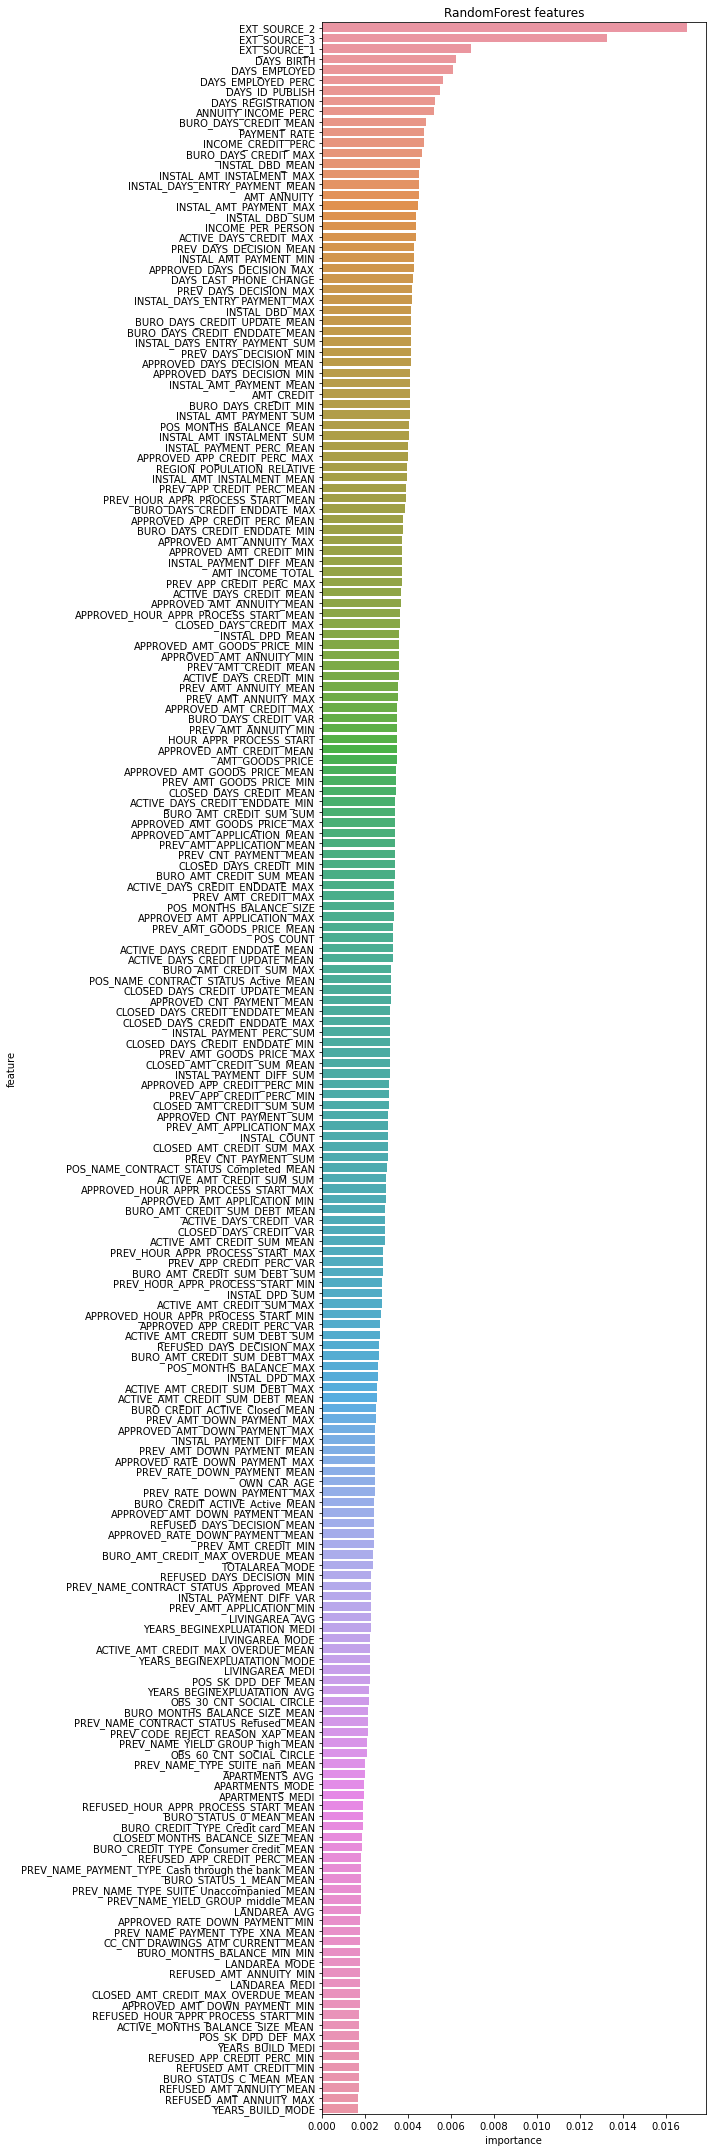

In [266]:
plt.rcParams['figure.figsize'] = [10, 30]
with timer("Run RandomForest"):
    feat_importance_rf, train_df_rf, test_df_rf = kfold_algo(df, cat_cols, num_cols, algo_name='RandomForest', n_folds=5, stratified=True, debug=debug)
%store feat_importance_rf
%store train_df_rf
%store test_df_rf

Starting XGBoost. Train shape: (307507, 798), test shape: (48744, 798)
Train AUC score 0.856868
Test  AUC score 0.789001
Run XGBoost - done in 5182s
Stored 'feat_importance_xgb' (DataFrame)
Stored 'train_df_xgb' (DataFrame)
Stored 'test_df_xgb' (DataFrame)


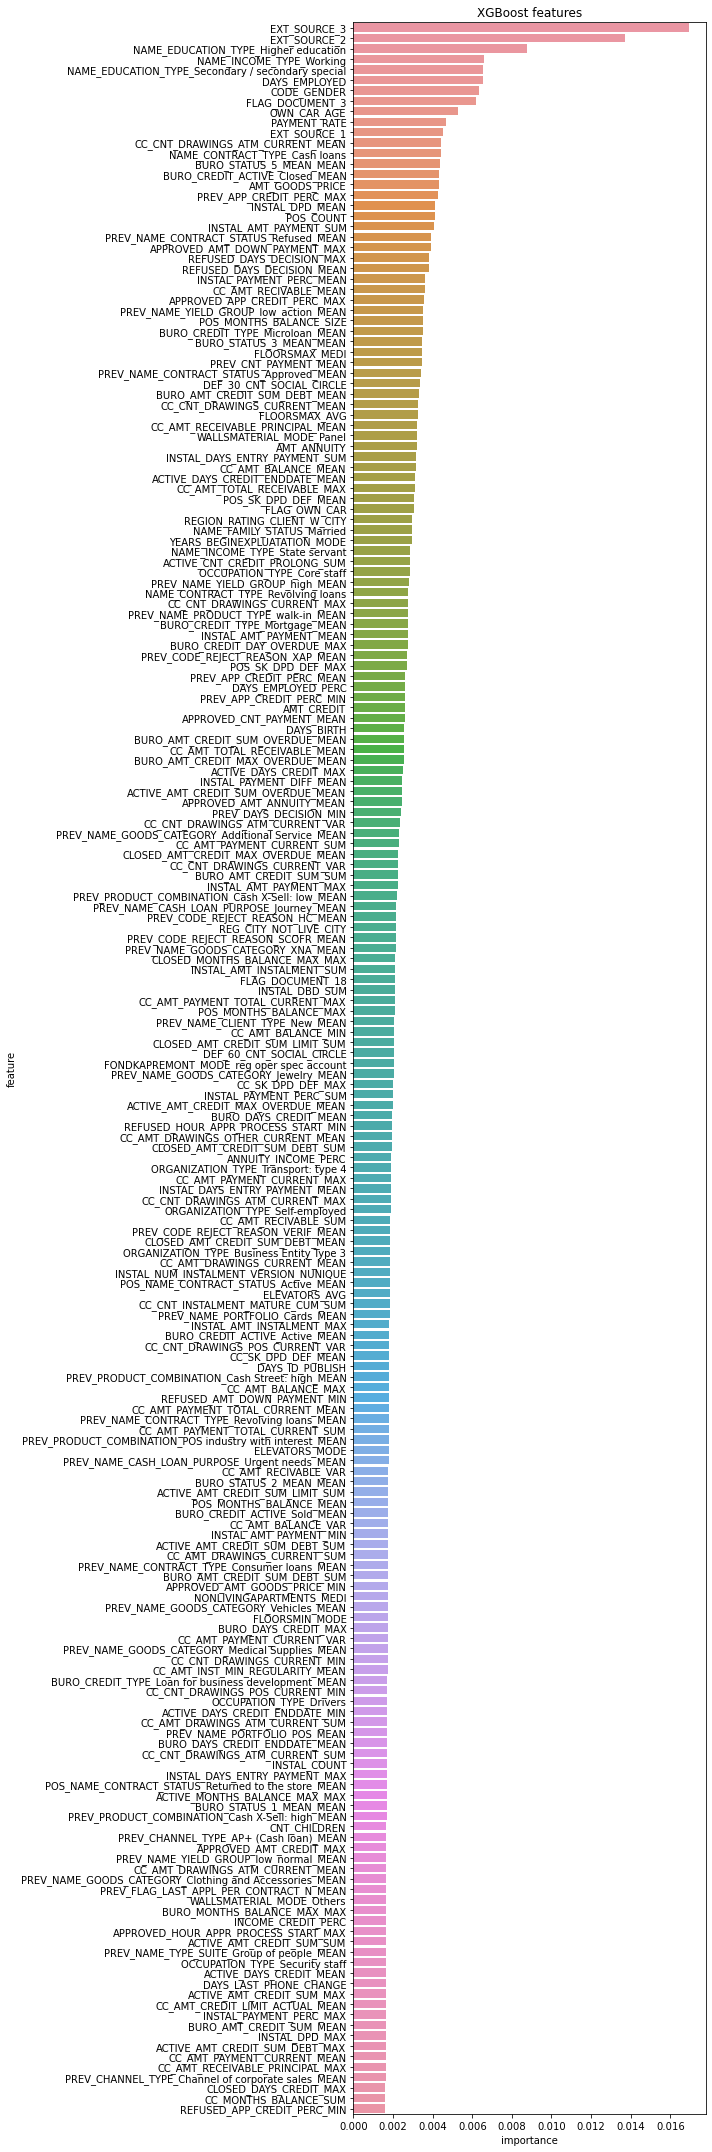

In [267]:
plt.rcParams['figure.figsize'] = [10, 30]
with timer("Run XGBoost"):
    feat_importance_xgb, train_df_xgb, test_df_xgb = kfold_algo(df, cat_cols, num_cols, algo_name='XGBoost', n_folds=5, stratified=True, debug=debug)
%store feat_importance_xgb
%store train_df_xgb
%store test_df_xgb

Starting LightGBM. Train shape: (307507, 798), test shape: (48744, 798)


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.797324	training's binary_logloss: 0.235273	valid_1's auc: 0.768236	valid_1's binary_logloss: 0.244001
[400]	training's auc: 0.819875	training's binary_logloss: 0.225714	valid_1's auc: 0.779265	valid_1's binary_logloss: 0.239941
[600]	training's auc: 0.834795	training's binary_logloss: 0.219602	valid_1's auc: 0.782934	valid_1's binary_logloss: 0.238694
[800]	training's auc: 0.847152	training's binary_logloss: 0.214483	valid_1's auc: 0.785105	valid_1's binary_logloss: 0.238042
[1000]	training's auc: 0.857618	training's binary_logloss: 0.210038	valid_1's auc: 0.785874	valid_1's binary_logloss: 0.237768
[1200]	training's auc: 0.867102	training's binary_logloss: 0.205925	valid_1's auc: 0.78653	valid_1's binary_logloss: 0.237559
[1400]	training's auc: 0.875408	training's binary_logloss: 0.202152	valid_1's auc: 0.786915	valid_1's binary_logloss: 0.237435
[16

c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.796945	training's binary_logloss: 0.235424	valid_1's auc: 0.771164	valid_1's binary_logloss: 0.242983
[400]	training's auc: 0.819578	training's binary_logloss: 0.225849	valid_1's auc: 0.78094	valid_1's binary_logloss: 0.239046
[600]	training's auc: 0.834434	training's binary_logloss: 0.219724	valid_1's auc: 0.784321	valid_1's binary_logloss: 0.237893
[800]	training's auc: 0.846625	training's binary_logloss: 0.21471	valid_1's auc: 0.785859	valid_1's binary_logloss: 0.237398
[1000]	training's auc: 0.85717	training's binary_logloss: 0.210282	valid_1's auc: 0.786572	valid_1's binary_logloss: 0.237175
[1200]	training's auc: 0.866838	training's binary_logloss: 0.206087	valid_1's auc: 0.787306	valid_1's binary_logloss: 0.23698
[1400]	training's auc: 0.875619	training's binary_logloss: 0.202133	valid_1's auc: 0.787468	valid_1's binary_logloss: 0.236948
[1600]

c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.796631	training's binary_logloss: 0.235561	valid_1's auc: 0.773636	valid_1's binary_logloss: 0.241998
[400]	training's auc: 0.819461	training's binary_logloss: 0.225942	valid_1's auc: 0.78426	valid_1's binary_logloss: 0.237662
[600]	training's auc: 0.834646	training's binary_logloss: 0.219731	valid_1's auc: 0.788097	valid_1's binary_logloss: 0.236284
[800]	training's auc: 0.84681	training's binary_logloss: 0.21473	valid_1's auc: 0.790256	valid_1's binary_logloss: 0.235549
[1000]	training's auc: 0.857284	training's binary_logloss: 0.21034	valid_1's auc: 0.791126	valid_1's binary_logloss: 0.235208
[1200]	training's auc: 0.866643	training's binary_logloss: 0.206259	valid_1's auc: 0.791598	valid_1's binary_logloss: 0.235036
[1400]	training's auc: 0.875468	training's binary_logloss: 0.202251	valid_1's auc: 0.792041	valid_1's binary_logloss: 0.234881
[1600]

c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.796643	training's binary_logloss: 0.235518	valid_1's auc: 0.775085	valid_1's binary_logloss: 0.241724
[400]	training's auc: 0.819545	training's binary_logloss: 0.2259	valid_1's auc: 0.785561	valid_1's binary_logloss: 0.237391
[600]	training's auc: 0.834712	training's binary_logloss: 0.219698	valid_1's auc: 0.789736	valid_1's binary_logloss: 0.235718
[800]	training's auc: 0.846816	training's binary_logloss: 0.214711	valid_1's auc: 0.791257	valid_1's binary_logloss: 0.235042
[1000]	training's auc: 0.857585	training's binary_logloss: 0.210188	valid_1's auc: 0.791933	valid_1's binary_logloss: 0.234694
[1200]	training's auc: 0.86719	training's binary_logloss: 0.205991	valid_1's auc: 0.792198	valid_1's binary_logloss: 0.23453
[1400]	training's auc: 0.876089	training's binary_logloss: 0.201963	valid_1's auc: 0.792337	valid_1's binary_logloss: 0.23447
[1600]	

c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.796867	training's binary_logloss: 0.235436	valid_1's auc: 0.773853	valid_1's binary_logloss: 0.242854
[400]	training's auc: 0.819268	training's binary_logloss: 0.225928	valid_1's auc: 0.784841	valid_1's binary_logloss: 0.238623
[600]	training's auc: 0.83425	training's binary_logloss: 0.219838	valid_1's auc: 0.788456	valid_1's binary_logloss: 0.23727
[800]	training's auc: 0.846413	training's binary_logloss: 0.214893	valid_1's auc: 0.790353	valid_1's binary_logloss: 0.236576
[1000]	training's auc: 0.856821	training's binary_logloss: 0.210531	valid_1's auc: 0.79131	valid_1's binary_logloss: 0.236199
[1200]	training's auc: 0.86636	training's binary_logloss: 0.206403	valid_1's auc: 0.791823	valid_1's binary_logloss: 0.235925
[1400]	training's auc: 0.874838	training's binary_logloss: 0.202557	valid_1's auc: 0.792402	valid_1's binary_logloss: 0.235739
[1600]

c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.796574	training's binary_logloss: 0.23559	valid_1's auc: 0.778827	valid_1's binary_logloss: 0.241034
[400]	training's auc: 0.818845	training's binary_logloss: 0.226034	valid_1's auc: 0.788941	valid_1's binary_logloss: 0.236664
[600]	training's auc: 0.833557	training's binary_logloss: 0.219937	valid_1's auc: 0.79272	valid_1's binary_logloss: 0.235262
[800]	training's auc: 0.845547	training's binary_logloss: 0.215051	valid_1's auc: 0.794291	valid_1's binary_logloss: 0.234654
[1000]	training's auc: 0.856021	training's binary_logloss: 0.210703	valid_1's auc: 0.79481	valid_1's binary_logloss: 0.234441
[1200]	training's auc: 0.865679	training's binary_logloss: 0.206546	valid_1's auc: 0.795519	valid_1's binary_logloss: 0.234195
[1400]	training's auc: 0.87452	training's binary_logloss: 0.202592	valid_1's auc: 0.795674	valid_1's binary_logloss: 0.234096
[1600]

c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.797058	training's binary_logloss: 0.235364	valid_1's auc: 0.776377	valid_1's binary_logloss: 0.241953
[400]	training's auc: 0.819133	training's binary_logloss: 0.225887	valid_1's auc: 0.786536	valid_1's binary_logloss: 0.238024
[600]	training's auc: 0.834044	training's binary_logloss: 0.219795	valid_1's auc: 0.790379	valid_1's binary_logloss: 0.236676
[800]	training's auc: 0.846008	training's binary_logloss: 0.214887	valid_1's auc: 0.792441	valid_1's binary_logloss: 0.235987
[1000]	training's auc: 0.856825	training's binary_logloss: 0.210304	valid_1's auc: 0.793701	valid_1's binary_logloss: 0.235521
[1200]	training's auc: 0.866539	training's binary_logloss: 0.206095	valid_1's auc: 0.794594	valid_1's binary_logloss: 0.235207
[1400]	training's auc: 0.875212	training's binary_logloss: 0.202182	valid_1's auc: 0.794983	valid_1's binary_logloss: 0.235062
[1

c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.796579	training's binary_logloss: 0.235438	valid_1's auc: 0.779	valid_1's binary_logloss: 0.242207
[400]	training's auc: 0.819111	training's binary_logloss: 0.225907	valid_1's auc: 0.789259	valid_1's binary_logloss: 0.237924
[600]	training's auc: 0.834246	training's binary_logloss: 0.219701	valid_1's auc: 0.792877	valid_1's binary_logloss: 0.236381
[800]	training's auc: 0.846089	training's binary_logloss: 0.214855	valid_1's auc: 0.793876	valid_1's binary_logloss: 0.235886
[1000]	training's auc: 0.856077	training's binary_logloss: 0.210656	valid_1's auc: 0.794755	valid_1's binary_logloss: 0.23556
[1200]	training's auc: 0.865137	training's binary_logloss: 0.206687	valid_1's auc: 0.795243	valid_1's binary_logloss: 0.235374
[1400]	training's auc: 0.874112	training's binary_logloss: 0.202706	valid_1's auc: 0.795275	valid_1's binary_logloss: 0.235285
Fold  

c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.797123	training's binary_logloss: 0.235473	valid_1's auc: 0.775451	valid_1's binary_logloss: 0.241612
[400]	training's auc: 0.819875	training's binary_logloss: 0.225838	valid_1's auc: 0.786047	valid_1's binary_logloss: 0.237095
[600]	training's auc: 0.834649	training's binary_logloss: 0.219757	valid_1's auc: 0.789537	valid_1's binary_logloss: 0.235717
[800]	training's auc: 0.846774	training's binary_logloss: 0.214735	valid_1's auc: 0.791194	valid_1's binary_logloss: 0.235085
[1000]	training's auc: 0.857264	training's binary_logloss: 0.210308	valid_1's auc: 0.791893	valid_1's binary_logloss: 0.234773
[1200]	training's auc: 0.86698	training's binary_logloss: 0.206081	valid_1's auc: 0.792241	valid_1's binary_logloss: 0.2346
[1400]	training's auc: 0.875902	training's binary_logloss: 0.202026	valid_1's auc: 0.792492	valid_1's binary_logloss: 0.234487
[1600

c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.797207	training's binary_logloss: 0.235345	valid_1's auc: 0.772678	valid_1's binary_logloss: 0.242983
[400]	training's auc: 0.819889	training's binary_logloss: 0.225737	valid_1's auc: 0.782203	valid_1's binary_logloss: 0.239197
[600]	training's auc: 0.834863	training's binary_logloss: 0.219553	valid_1's auc: 0.785404	valid_1's binary_logloss: 0.237953
[800]	training's auc: 0.84716	training's binary_logloss: 0.214501	valid_1's auc: 0.787079	valid_1's binary_logloss: 0.237363
[1000]	training's auc: 0.857742	training's binary_logloss: 0.210032	valid_1's auc: 0.787811	valid_1's binary_logloss: 0.237116
[1200]	training's auc: 0.867185	training's binary_logloss: 0.205866	valid_1's auc: 0.788164	valid_1's binary_logloss: 0.236989
[1400]	training's auc: 0.875815	training's binary_logloss: 0.201965	valid_1's auc: 0.788466	valid_1's binary_logloss: 0.236918
[16

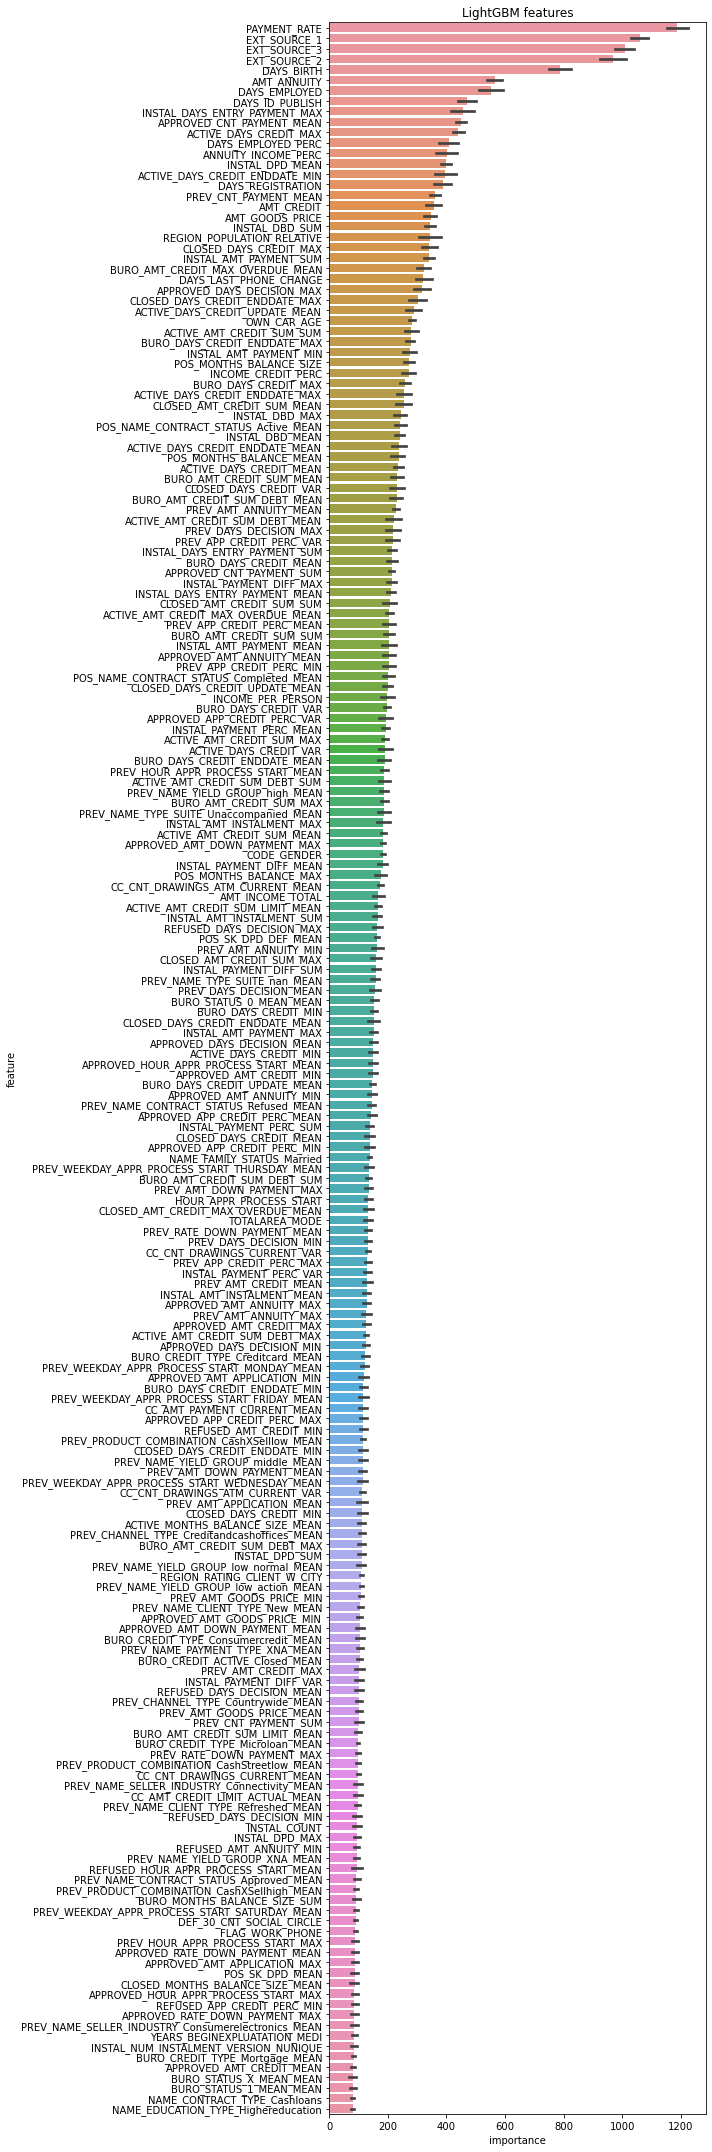

In [268]:
plt.rcParams['figure.figsize'] = [10, 30]
with timer("Run LightGBM with kfold"):
    feat_importance_lgbm, train_df_lgbm, test_df_lgbm = kfold_lightgbm(df, n_folds=10, stratified=True, debug=debug)
%store feat_importance_lgbm
%store train_df_lgbm
%store test_df_lgbm

## 2-3

In [269]:
selected_features_file = data_dir+'selected_features.csv'
selected_features = read_feature_selection(selected_features_file, min_level=2)
selected_features.head()

,Column1,Table,Row,Traduction description,Interet (0-3),Commentaire interet,Operations,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID de pret dans notre echantillon,3.0,NaN,NaN,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Variable cible (1 - Client avec difficultes de...,3.0,NaN,NaN,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification si le pret est cash ou revolving,3.0,Revolving = plutet surendettatoire,NaN,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Sexe du client,3.0,LGBM2,NaN,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag Si le client possede une voiture,3.0,NaN,NaN,Flag if the client owns a car,NaN


In [270]:
debug = False
df, cat_cols, num_cols = preprocess(selected_features=selected_features, debug=debug)

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 93)
Process bureau and bureau_balance - done in 14s
Previous applications df shape: (338858, 114)
Process previous_applications - done in 8s
Pos-cash balance df shape: (337252, 13)
Process POS-CASH balance - done in 7s
Installments payments df shape: (339585, 19)
Process installments payments - done in 7s
Credit card balance df shape: (103558, 81)
Process credit card balance - done in 11s


In [271]:
plt.rcParams['figure.figsize'] = [10, 30]
with timer("Run RandomForest"):
    feat_importance_rf, train_df_rf, test_df_rf = kfold_algo(df, cat_cols, num_cols, algo_name='RandomForest', n_folds=5, stratified=True, debug=debug)
# %store feat_importance_rf
# %store train_df_rf
# %store test_df_rf

Starting RandomForest. Train shape: (307507, 445), test shape: (48744, 445)


Starting XGBoost. Train shape: (10000, 259), test shape: (10000, 259)
Train AUC score 0.999873
Test  AUC score 0.744460
Run XGBoost - done in 90s


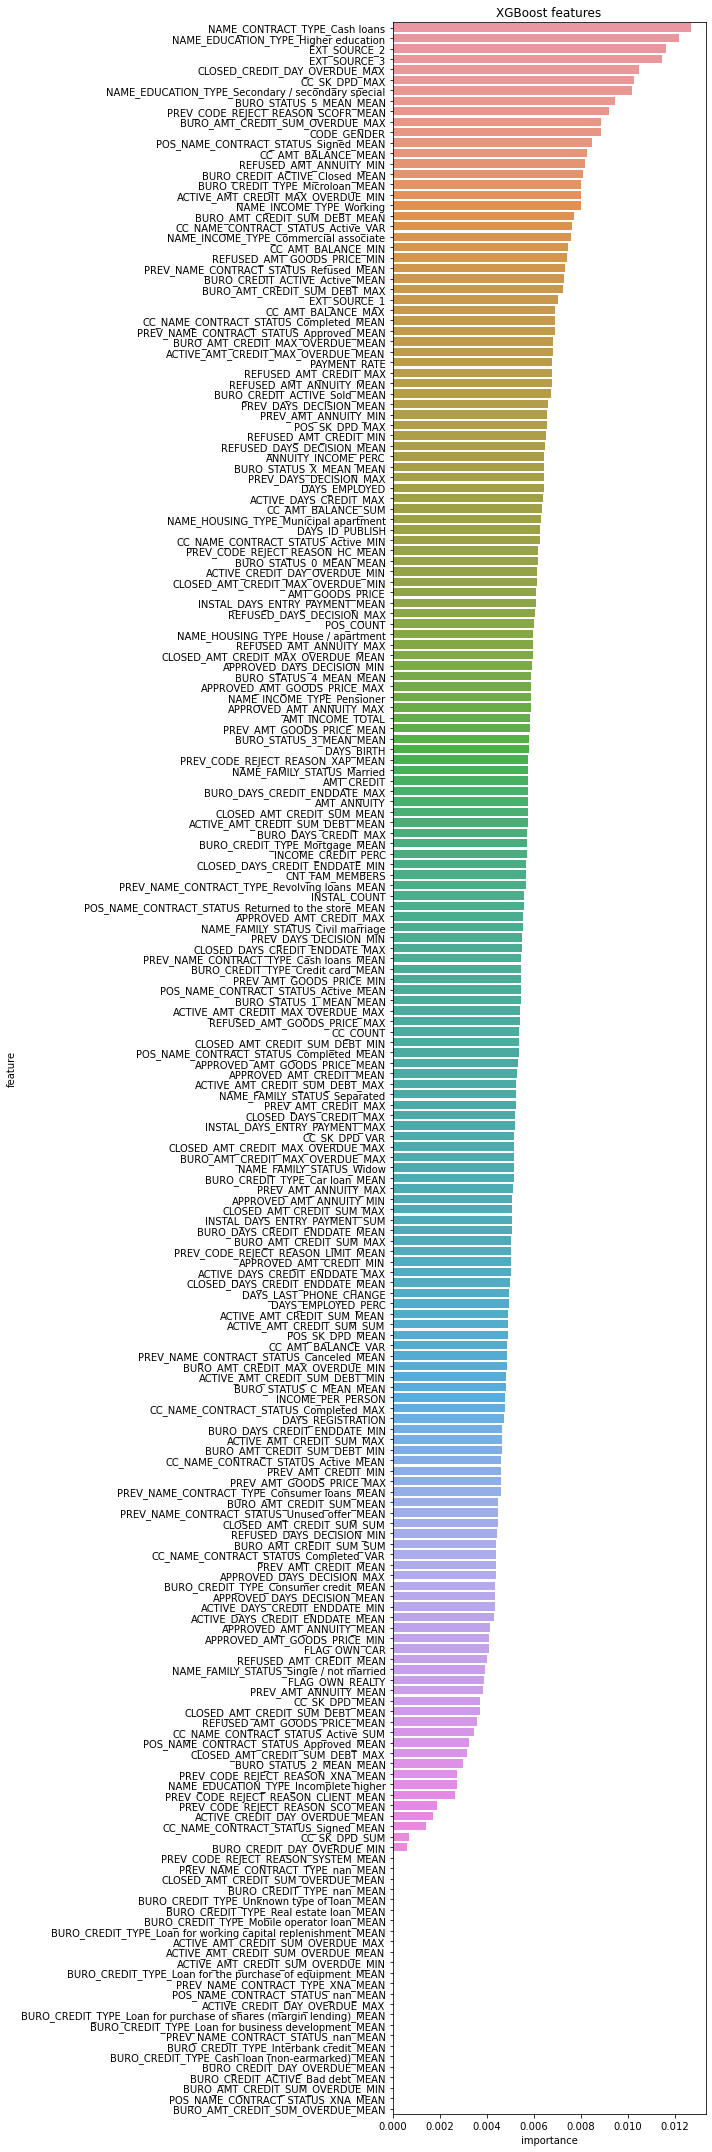

In [ ]:
plt.rcParams['figure.figsize'] = [10, 30]
with timer("Run XGBoost"):
    feat_importance_xgb, train_df_xgb, test_df_xgb = kfold_algo(df, cat_cols, num_cols, algo_name='XGBoost', n_folds=5, stratified=True, debug=debug)
# %store feat_importance_xgb
# %store train_df_xgb
# %store test_df_xgb

Starting LightGBM. Train shape: (10000, 259), test shape: (10000, 259)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.871475	training's binary_logloss: 0.205223	valid_1's auc: 0.763557	valid_1's binary_logloss: 0.243375
[400]	training's auc: 0.915624	training's binary_logloss: 0.18067	valid_1's auc: 0.757467	valid_1's binary_logloss: 0.245113
Fold  1 AUC : 0.763877


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.869686	training's binary_logloss: 0.206872	valid_1's auc: 0.78055	valid_1's binary_logloss: 0.233953
[400]	training's auc: 0.913761	training's binary_logloss: 0.182411	valid_1's auc: 0.782441	valid_1's binary_logloss: 0.232932
Fold  2 AUC : 0.785861


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.870348	training's binary_logloss: 0.205744	valid_1's auc: 0.770872	valid_1's binary_logloss: 0.236763
[400]	training's auc: 0.913137	training's binary_logloss: 0.181603	valid_1's auc: 0.774751	valid_1's binary_logloss: 0.2347
[600]	training's auc: 0.940861	training's binary_logloss: 0.163792	valid_1's auc: 0.771191	valid_1's binary_logloss: 0.235469
Fold  3 AUC : 0.775724


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.873178	training's binary_logloss: 0.204952	valid_1's auc: 0.766394	valid_1's binary_logloss: 0.236903
[400]	training's auc: 0.914021	training's binary_logloss: 0.181487	valid_1's auc: 0.767465	valid_1's binary_logloss: 0.236513
Fold  4 AUC : 0.769217
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.872696	training's binary_logloss: 0.205585	valid_1's auc: 0.757954	valid_1's binary_logloss: 0.238137
Fold  5 AUC : 0.758413
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.873452	training's binary_logloss: 0.205175	valid_1's auc: 0.744664	valid_1's binary_logloss: 0.239251
[400]	training's auc: 0.915191	training's binary_logloss: 0.181209	valid_1's auc: 0.747351	valid_1's binary_logloss: 0.238547
Fold  6 AUC : 0.749307


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.870962	training's binary_logloss: 0.205752	valid_1's auc: 0.758579	valid_1's binary_logloss: 0.239336
Fold  7 AUC : 0.761858
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.872441	training's binary_logloss: 0.206046	valid_1's auc: 0.780557	valid_1's binary_logloss: 0.23116
[400]	training's auc: 0.915408	training's binary_logloss: 0.181777	valid_1's auc: 0.780192	valid_1's binary_logloss: 0.231079
Fold  8 AUC : 0.784877
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.871039	training's binary_logloss: 0.205464	valid_1's auc: 0.753781	valid_1's binary_logloss: 0.242776
[400]	training's auc: 0.915121	training's binary_logloss: 0.181127	valid_1's auc: 0.755582	valid_1's binary_logloss: 0.242616
Fold  9 AUC : 0.757327
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.874271	training's binary_logloss: 0.204672	valid_1's auc: 0.742145	valid_1's binary_logloss: 0.242034
Fold 10 AUC : 0.744481
Full train AUC score 0.764633
Full test  AUC score 0.765094
Alors, c'est pareil, hein ?
Run LightGBM with kfold - done in 45s


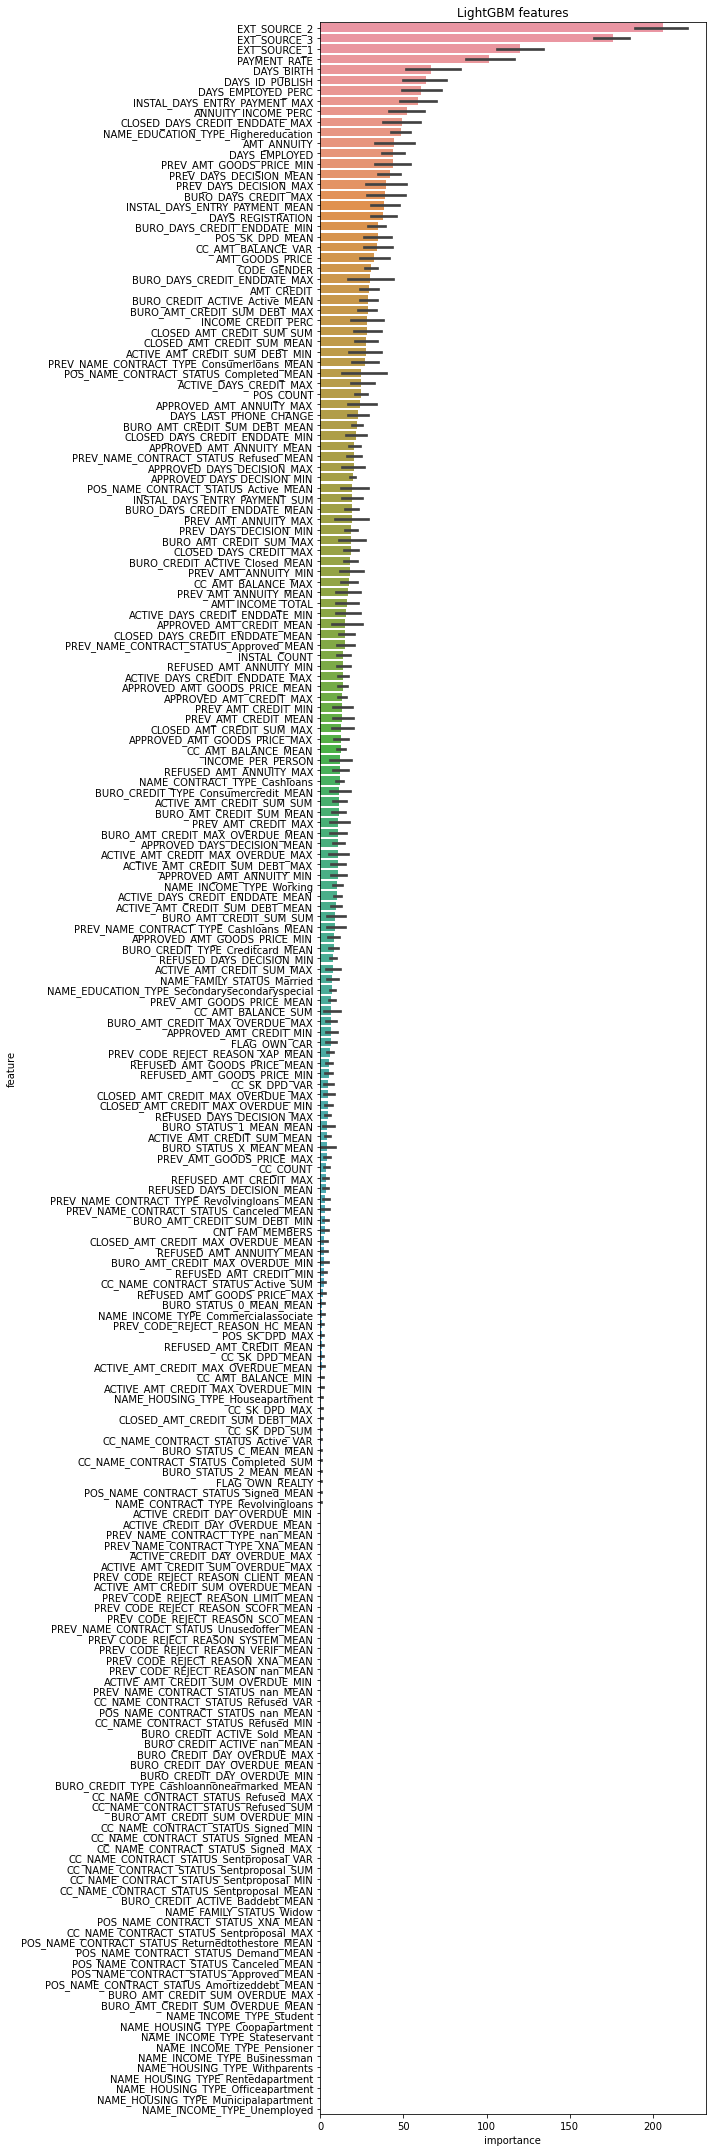

In [ ]:
plt.rcParams['figure.figsize'] = [10, 30]
with timer("Run LightGBM with kfold"):
    feat_importance_lgbm, train_df_lgbm, test_df_lgbm = kfold_lightgbm(df, n_folds=10, stratified=True, debug=debug)
# %store feat_importance_lgbm
# %store train_df_lgbm
# %store test_df_lgbm

## 3

In [ ]:
selected_features_file = data_dir+'selected_features.csv'
selected_features = read_feature_selection(selected_features_file, min_level=3)
selected_features.head()

,Column1,Table,Row,Traduction description,Interet (0-3),Commentaire interet,Operations,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID de pret dans notre echantillon,3.0,NaN,NaN,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Variable cible (1 - Client avec difficultes de...,3.0,NaN,NaN,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification si le pret est cash ou revolving,3.0,Revolving = plutet surendettatoire,NaN,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Sexe du client,3.0,LGBM2,NaN,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag Si le client possede une voiture,3.0,NaN,NaN,Flag if the client owns a car,NaN


In [ ]:
debug = False
df, cat_cols, num_cols = preprocess(selected_features=selected_features, debug=debug)

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 18s
Previous applications df shape: (338858, 249)
Process previous_applications - done in 27s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 6s
Installments payments df shape: (339585, 26)
Process installments payments - done in 20s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 20s


Starting RandomForest. Train shape: (10000, 259), test shape: (10000, 259)
Train AUC score 0.789500
Test  AUC score 0.730966
Run RandomForest - done in 125s


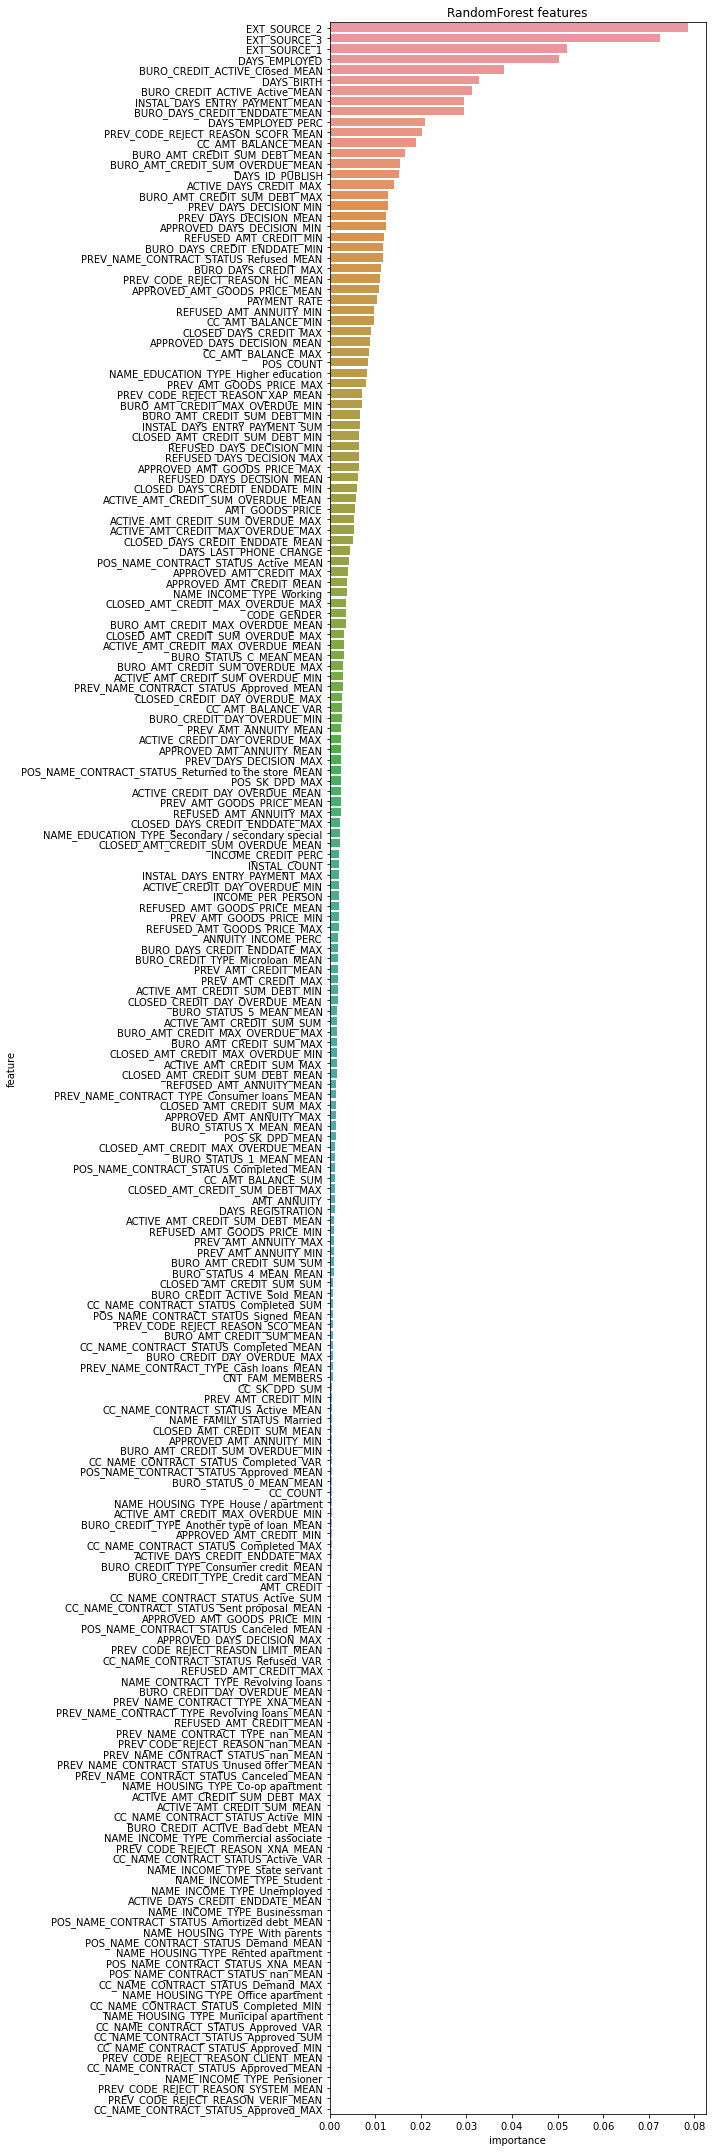

In [ ]:
plt.rcParams['figure.figsize'] = [10, 30]
with timer("Run RandomForest"):
    feat_importance_rf, train_df_rf, test_df_rf = kfold_algo(df, cat_cols, num_cols, algo_name='RandomForest', n_folds=5, stratified=True, debug=debug)
# %store feat_importance_rf
# %store train_df_rf
# %store test_df_rf

Starting XGBoost. Train shape: (10000, 259), test shape: (10000, 259)
Train AUC score 0.999873
Test  AUC score 0.744460
Run XGBoost - done in 90s


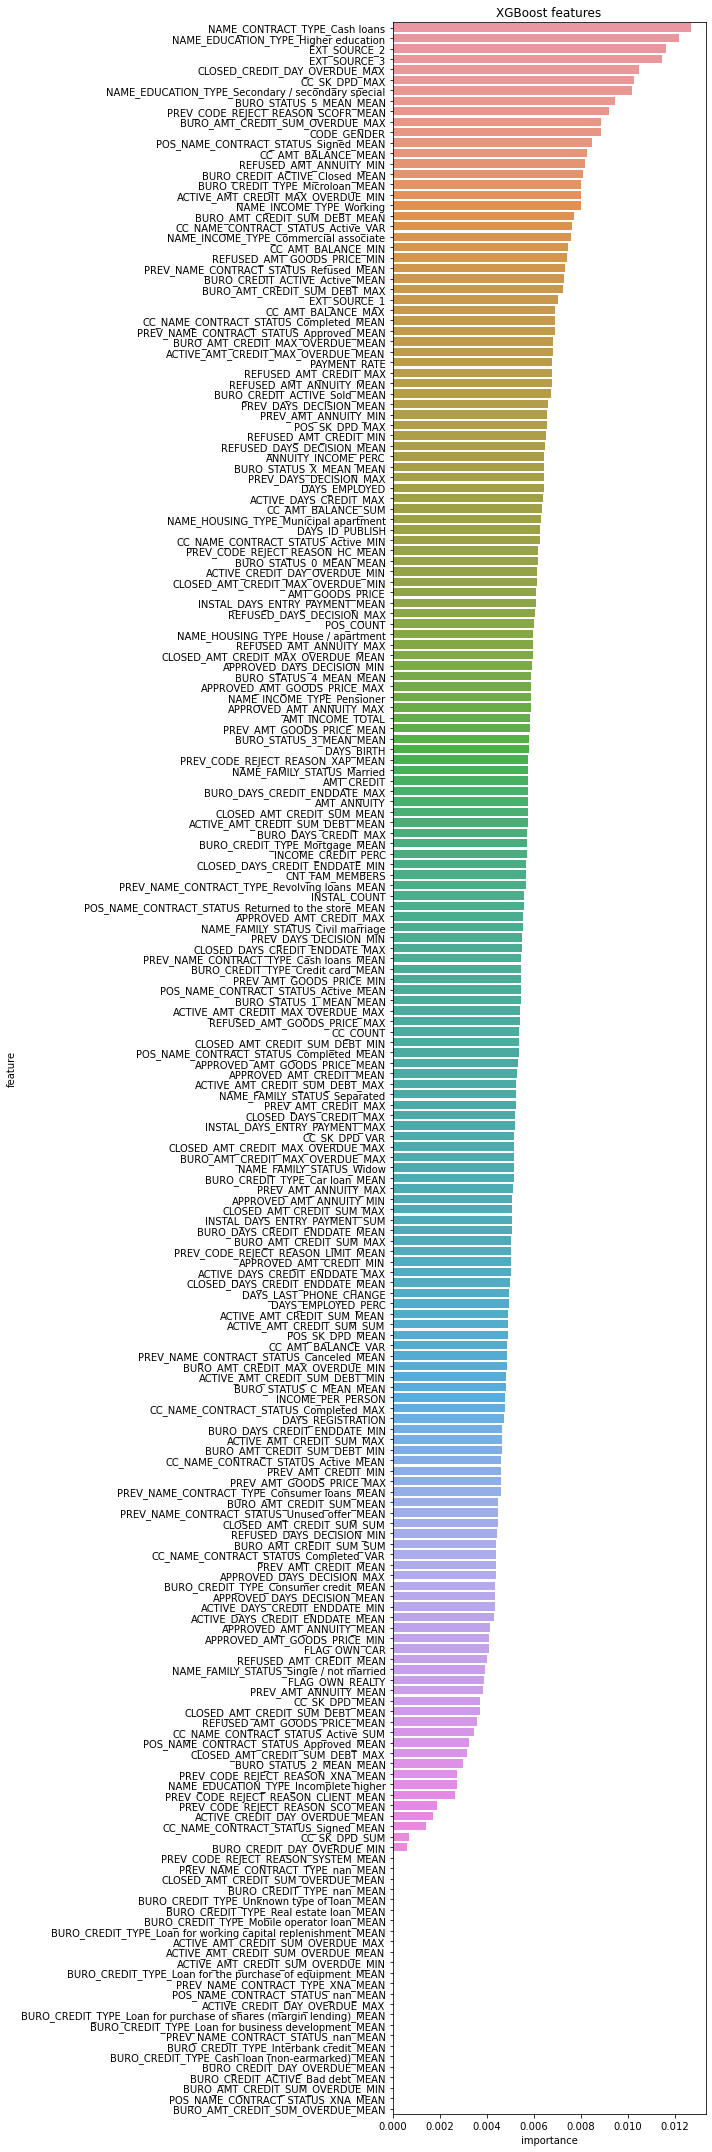

In [ ]:
plt.rcParams['figure.figsize'] = [10, 30]
with timer("Run XGBoost"):
    feat_importance_xgb, train_df_xgb, test_df_xgb = kfold_algo(df, cat_cols, num_cols, algo_name='XGBoost', n_folds=5, stratified=True, debug=debug)
# %store feat_importance_xgb
# %store train_df_xgb
# %store test_df_xgb

Starting LightGBM. Train shape: (10000, 259), test shape: (10000, 259)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.871475	training's binary_logloss: 0.205223	valid_1's auc: 0.763557	valid_1's binary_logloss: 0.243375
[400]	training's auc: 0.915624	training's binary_logloss: 0.18067	valid_1's auc: 0.757467	valid_1's binary_logloss: 0.245113
Fold  1 AUC : 0.763877


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.869686	training's binary_logloss: 0.206872	valid_1's auc: 0.78055	valid_1's binary_logloss: 0.233953
[400]	training's auc: 0.913761	training's binary_logloss: 0.182411	valid_1's auc: 0.782441	valid_1's binary_logloss: 0.232932
Fold  2 AUC : 0.785861


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.870348	training's binary_logloss: 0.205744	valid_1's auc: 0.770872	valid_1's binary_logloss: 0.236763
[400]	training's auc: 0.913137	training's binary_logloss: 0.181603	valid_1's auc: 0.774751	valid_1's binary_logloss: 0.2347
[600]	training's auc: 0.940861	training's binary_logloss: 0.163792	valid_1's auc: 0.771191	valid_1's binary_logloss: 0.235469
Fold  3 AUC : 0.775724


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.873178	training's binary_logloss: 0.204952	valid_1's auc: 0.766394	valid_1's binary_logloss: 0.236903
[400]	training's auc: 0.914021	training's binary_logloss: 0.181487	valid_1's auc: 0.767465	valid_1's binary_logloss: 0.236513
Fold  4 AUC : 0.769217
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.872696	training's binary_logloss: 0.205585	valid_1's auc: 0.757954	valid_1's binary_logloss: 0.238137
Fold  5 AUC : 0.758413
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.873452	training's binary_logloss: 0.205175	valid_1's auc: 0.744664	valid_1's binary_logloss: 0.239251
[400]	training's auc: 0.915191	training's binary_logloss: 0.181209	valid_1's auc: 0.747351	valid_1's binary_logloss: 0.238547
Fold  6 AUC : 0.749307


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.870962	training's binary_logloss: 0.205752	valid_1's auc: 0.758579	valid_1's binary_logloss: 0.239336
Fold  7 AUC : 0.761858
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.872441	training's binary_logloss: 0.206046	valid_1's auc: 0.780557	valid_1's binary_logloss: 0.23116
[400]	training's auc: 0.915408	training's binary_logloss: 0.181777	valid_1's auc: 0.780192	valid_1's binary_logloss: 0.231079
Fold  8 AUC : 0.784877
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.871039	training's binary_logloss: 0.205464	valid_1's auc: 0.753781	valid_1's binary_logloss: 0.242776
[400]	training's auc: 0.915121	training's binary_logloss: 0.181127	valid_1's auc: 0.755582	valid_1's binary_logloss: 0.242616
Fold  9 AUC : 0.757327
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Public\wpython\V_3.7.6\soft\python-3.7.6.amd64\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' 

[200]	training's auc: 0.874271	training's binary_logloss: 0.204672	valid_1's auc: 0.742145	valid_1's binary_logloss: 0.242034
Fold 10 AUC : 0.744481
Full train AUC score 0.764633
Full test  AUC score 0.765094
Alors, c'est pareil, hein ?
Run LightGBM with kfold - done in 45s


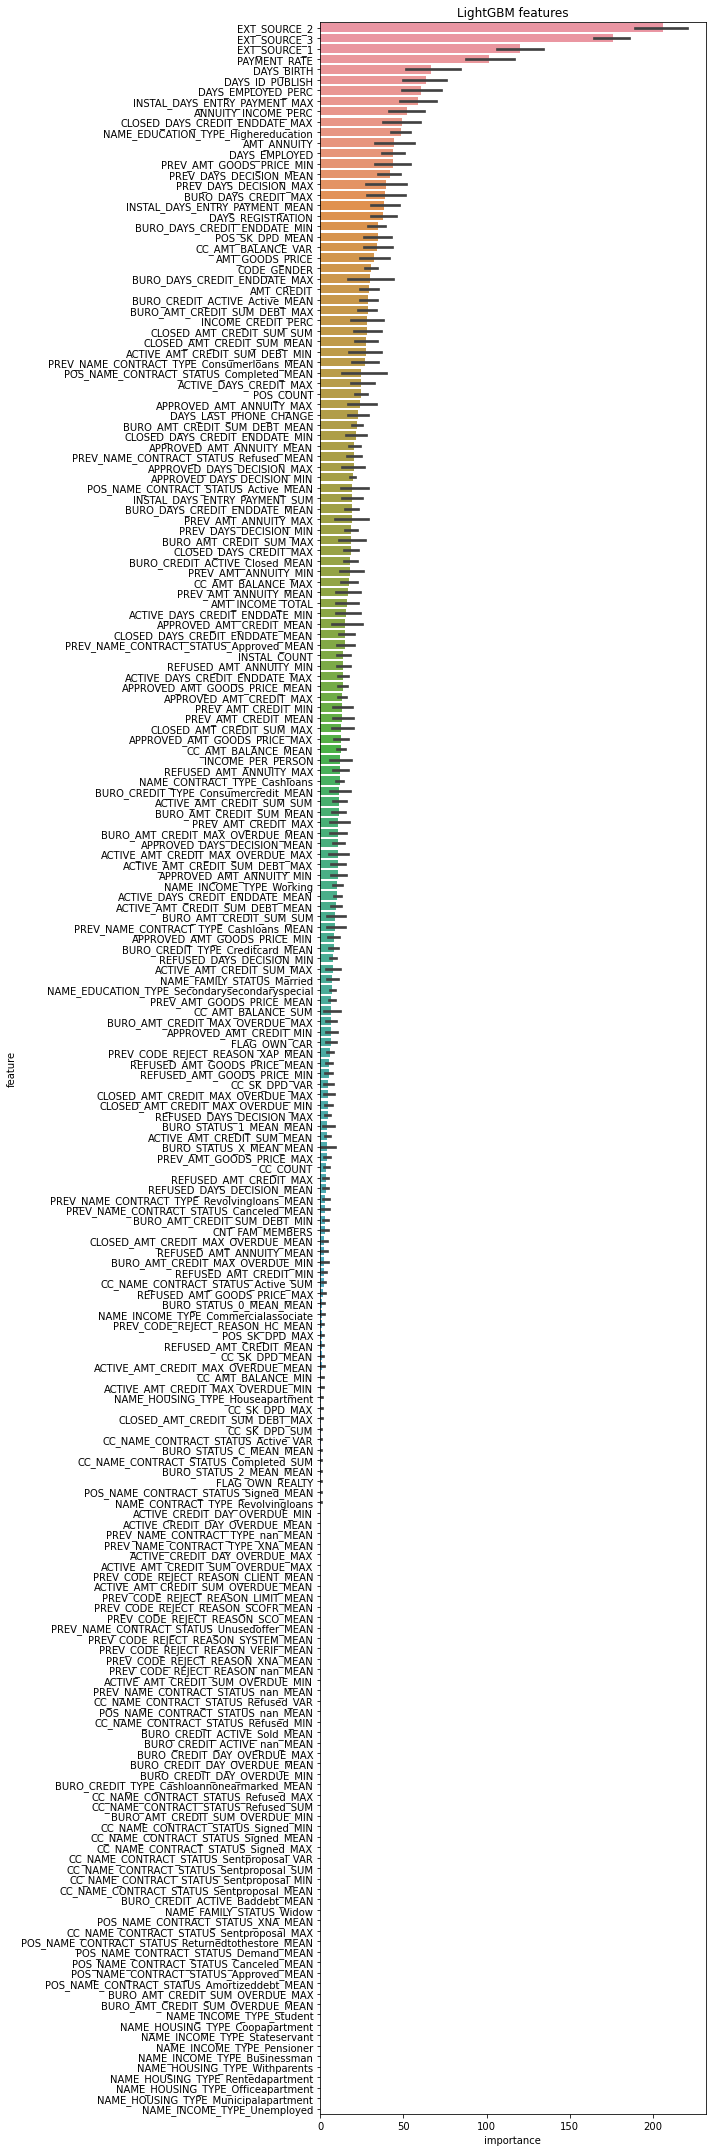

In [ ]:
plt.rcParams['figure.figsize'] = [10, 30]
with timer("Run LightGBM with kfold"):
    feat_importance_lgbm, train_df_lgbm, test_df_lgbm = kfold_lightgbm(df, n_folds=10, stratified=True, debug=debug)
# %store feat_importance_lgbm
# %store train_df_lgbm
# %store test_df_lgbm

In [ ]:
df_application_train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

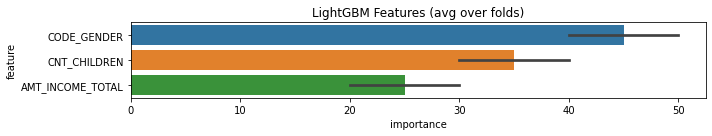

In [ ]:
plt.rcParams['figure.figsize'] = [10, 2]
display_importances(feature_importance_df_essai, 3)

DCQJC, on a tout à fait le droit d'ajouter les informations provenant des autres tables, et celles que l'on a créées, aux Dataframes train et test.

In [49]:
submission_file_name = "submission_kernel02.csv"

In [ ]:
feature_importance_df_lgbm = feature_importance_df

NameError: name 'feature_importance_df' is not defined

In [ ]:
df.shape

(356251, 798)

In [55]:
%store feat_importance_lgbm
%store train_df_lgbm
%store test_df_lgbm

Stored 'feat_importance_lgbm' (DataFrame)
Stored 'train_df_lgbm' (DataFrame)
Stored 'test_df_lgbm' (DataFrame)


In [56]:
%store -r feat_importance_lgbm
%store -r train_df_lgbm
%store -r test_df_lgbm

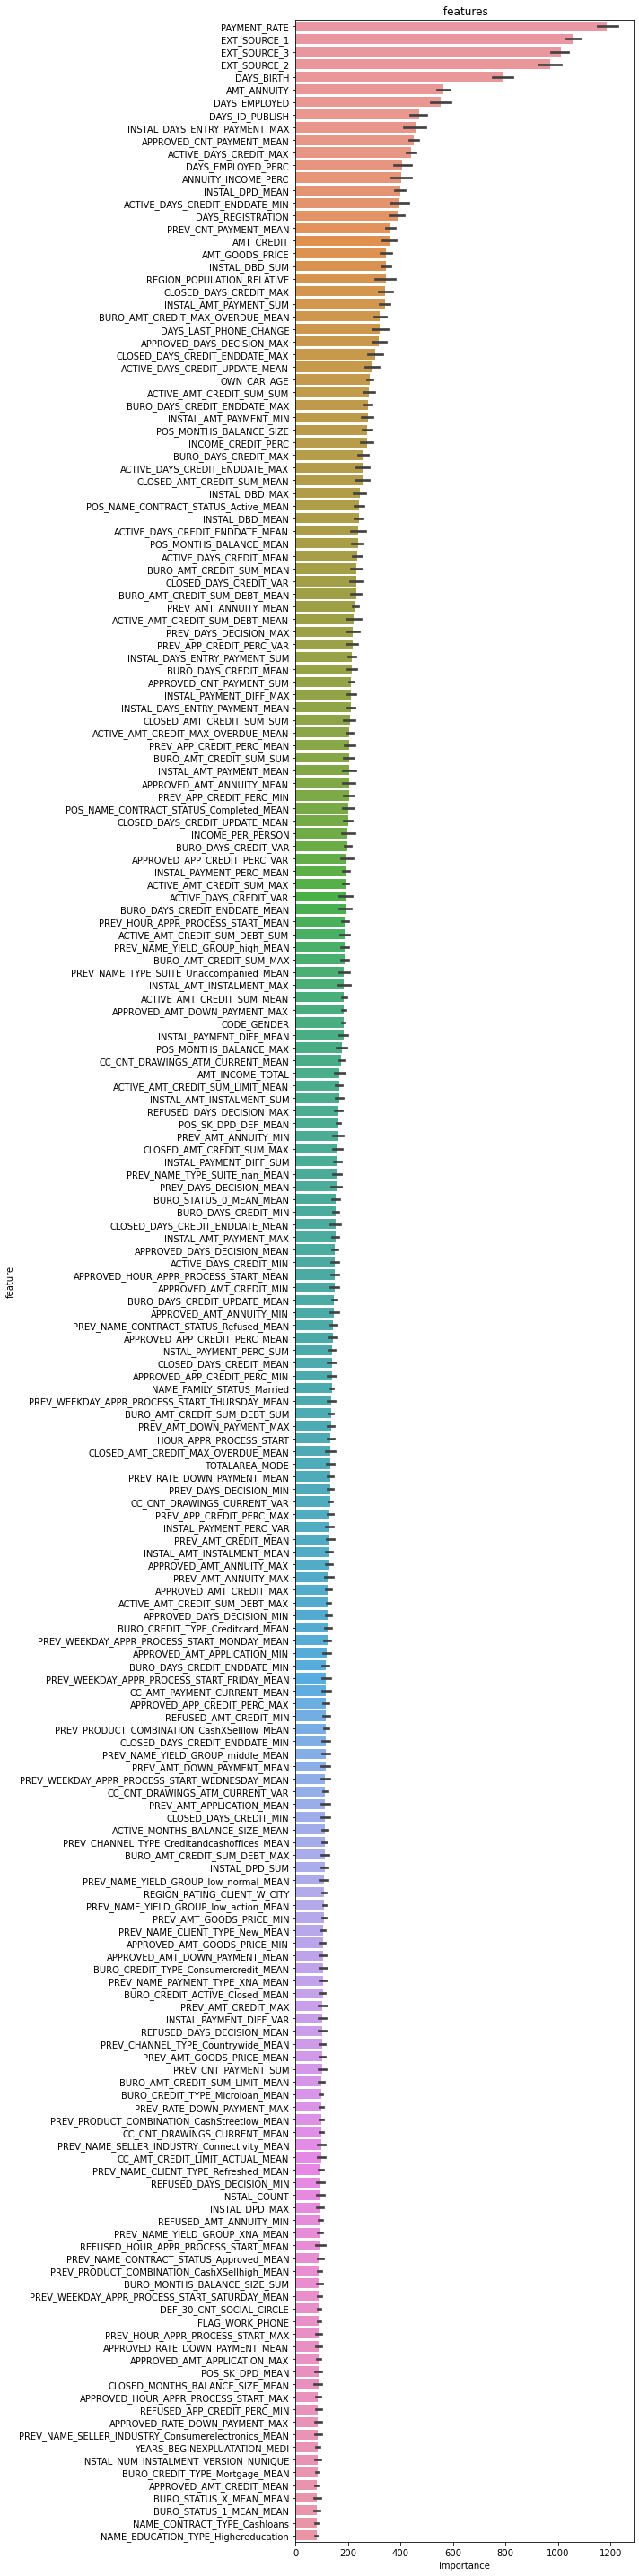

In [57]:
plt.rcParams['figure.figsize'] = [10, 40]
display_importances(feat_importance_lgbm, 200)

In [58]:
feat_importance = feat_importance_lgbm.copy()

In [164]:
# for col, val in feat_importance[['feature', 'importance']].values:
fi = feat_importance[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)
for col, val in zip(fi.index, fi.values):
    if 'NAME_CONTRACT_STATUS' in col: #ACTIVE_, CLOSED_, BURO_
        print(col, val)

POS_NAME_CONTRACT_STATUS_Active_MEAN [243.3]
POS_NAME_CONTRACT_STATUS_Completed_MEAN [202.3]
PREV_NAME_CONTRACT_STATUS_Refused_MEAN [144.4]
PREV_NAME_CONTRACT_STATUS_Approved_MEAN [93.]
PREV_NAME_CONTRACT_STATUS_Canceled_MEAN [68.]
POS_NAME_CONTRACT_STATUS_Signed_MEAN [54.1]
POS_NAME_CONTRACT_STATUS_Returnedtothestore_MEAN [36.6]
CC_NAME_CONTRACT_STATUS_Active_SUM [18.]
CC_NAME_CONTRACT_STATUS_Active_VAR [16.4]
CC_NAME_CONTRACT_STATUS_Active_MEAN [8.4]
CC_NAME_CONTRACT_STATUS_Signed_VAR [7.]
PREV_NAME_CONTRACT_STATUS_Unusedoffer_MEAN [5.8]
POS_NAME_CONTRACT_STATUS_Approved_MEAN [3.9]
CC_NAME_CONTRACT_STATUS_Completed_MEAN [3.3]
CC_NAME_CONTRACT_STATUS_Completed_VAR [2.7]
CC_NAME_CONTRACT_STATUS_Completed_SUM [2.6]
CC_NAME_CONTRACT_STATUS_Active_MIN [1.4]
CC_NAME_CONTRACT_STATUS_Signed_MEAN [0.8]
CC_NAME_CONTRACT_STATUS_Completed_MAX [0.2]
CC_NAME_CONTRACT_STATUS_Sentproposal_SUM [0.]
POS_NAME_CONTRACT_STATUS_nan_MEAN [0.]
POS_NAME_CONTRACT_STATUS_XNA_MEAN [0.]
CC_NAME_CONTRACT_STATUS_n

In [163]:
df_POS_CASH_balance['NAME_CONTRACT_STATUS'].value_counts()

Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [86]:
df_bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [85]:
df_bureau['AMT_CREDIT_SUM']#.value_counts()

0            91323.00
1           225000.00
2           464323.50
3            90000.00
4          2700000.00
              ...    
1716423      11250.00
1716424      38130.84
1716425      15570.00
1716426      36000.00
1716427      22500.00
Name: AMT_CREDIT_SUM, Length: 1716428, dtype: float64

On peut par exemple retenir les colonnes jusqu'à `CLOSED_AMT_CREDIT_SUM_MEAN`

# TODO

 **Mentorat 26/10**
 - [ ] VisualStudio : good (mieux en noir ^^)
 - [ ] Données : éviter de passer trop de temps à sélectionner et travailler ses données + d'autres contrib qui ont bien perfé
 - [ ] Modélisation : 60% (dont SHAP)
 - [ ] Dashboard : 30%
 - [ ] API : 10% (Flask conseillé, d'autant que c'est du Python, les trucs tout faits c'est cac... dommage)

**Perso**
- [X] Comprendre si et comment le noyau suggéré se sert des infos des autres tables.
- [X] Vérifier qu'un ID dans la table test a bien des infos dans ces autres tables : NON !
- [X] Du coup regarder le taux de NaN dans les df_train et df_test, du noyau Kaggle : pas mal, et ça ne gêne pas LightGBM
- [X] Comprendre le diagramme de feature importance :
    - [X] pourquoi seulement 40
    - [X] que représente réellement le trait : IC ? min;max ? oui, il fait croire, sur un test
    - [X] pourquoi le classement affiché n'est pas réellement décroissant, même quand on tient compte des bornes de l'intervalle du trait ? Je ne sais pas, mais c'est résolu en spécifiant un paramètre order à sns.barplot()
- [ ] Extraire les 100 features les plus importantes de LighGBM
- [ ] Déterminer correctement l'ensemble des colonnes catégorielles et numériques après les différentes transformations
- [X] Passer un SimpleImputer aux colonnes numériques (les NaN dans les cols catég. sont normalement devenus des 1 dans une noubelle catég. _nan)
- [ ] Passer un KNNImputer aux colonnes numériques
- [X] Pipeliner les imputations et scaling à RandomForest
- [ ] Faire aboutir RandomForest
- [ ] Extraire les 100 features les plus importantes de RandomForest
- [ ] Les comparer à celles de LightGBM
- [ ] Ajouter des features perso (nb de soldes négatifs dans les 6 derniers mois, etc., voir portable)
- [ ] Corrections de :
    - [ ] `ORGANIZATION_TYPE_Industry: type 1`
    - [ ] `NAME_FAMILY_STATUS_Single / not married`

**04/11**
 - [ ] Repasser le LightGBM
 - [ ] Checker l'importance des variables pour LightGBM, par rapport au Deep Dive 
 - [ ] Nettoyer le STATUS==NaN et mettre 'X' à la place, dans bureau_balance

In [ ]:
np.median([0, 1], )

0.5